# 1 Load Dataset & Preview Audio Sample

In [ ]:
#Install Required Libraries
!pip install librosa transformers datasets jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
folder = '/content/drive/My Drive/ITI110'

Mounted at /content/drive


In [ ]:
# Unzip the Dataset
import os
import zipfile

# Define the path to the zip file in your Google Drive and where to unzip in Colab's virtual space
zip_file_path = folder + '/RAVDESS_EmotionalSpeechAudio.zip'
data_folder = '/content/RAVDESS'  # Virtual Colab space (not on Google Drive)

# Unzipping the dataset into the Colab virtual space
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_folder)

# Now you can access the unzipped data in Colab
print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
# Explore Dataset Structure
# run the following command to check the folder structure and see how files are organized

#import os

# List files and folders in the extracted dataset
for root, dirs, files in os.walk(data_folder):
    print(f"📂 {root}")
    for file in files[:5]:  # Show only the first 5 files per folder
        print(f"  📄 {file}")
    print("------")


📂 /content/RAVDESS
------
📂 /content/RAVDESS/Actor_19
  📄 03-01-03-01-01-01-19.wav
  📄 03-01-02-01-01-02-19.wav
  📄 03-01-05-01-02-01-19.wav
  📄 03-01-06-01-02-01-19.wav
  📄 03-01-04-02-01-02-19.wav
------
📂 /content/RAVDESS/Actor_11
  📄 03-01-05-01-01-02-11.wav
  📄 03-01-02-01-01-02-11.wav
  📄 03-01-02-02-02-01-11.wav
  📄 03-01-04-01-01-01-11.wav
  📄 03-01-01-01-01-02-11.wav
------
📂 /content/RAVDESS/Actor_15
  📄 03-01-02-01-02-02-15.wav
  📄 03-01-01-01-02-01-15.wav
  📄 03-01-03-01-02-01-15.wav
  📄 03-01-06-01-01-01-15.wav
  📄 03-01-05-02-02-01-15.wav
------
📂 /content/RAVDESS/Actor_13
  📄 03-01-03-02-01-01-13.wav
  📄 03-01-01-01-01-01-13.wav
  📄 03-01-05-02-02-02-13.wav
  📄 03-01-07-02-02-01-13.wav
  📄 03-01-01-01-02-02-13.wav
------
📂 /content/RAVDESS/Actor_03
  📄 03-01-05-01-02-02-03.wav
  📄 03-01-03-02-01-02-03.wav
  📄 03-01-04-01-01-02-03.wav
  📄 03-01-03-01-02-02-03.wav
  📄 03-01-03-02-02-02-03.wav
------
📂 /content/RAVDESS/Actor_04
  📄 03-01-03-02-02-01-04.wav
  📄 03-01-01-01-0

Sample Rate: 48000 Hz
Audio Duration: 3.64 seconds
File Path: /content/RAVDESS/Actor_19/03-01-03-01-01-01-19.wav


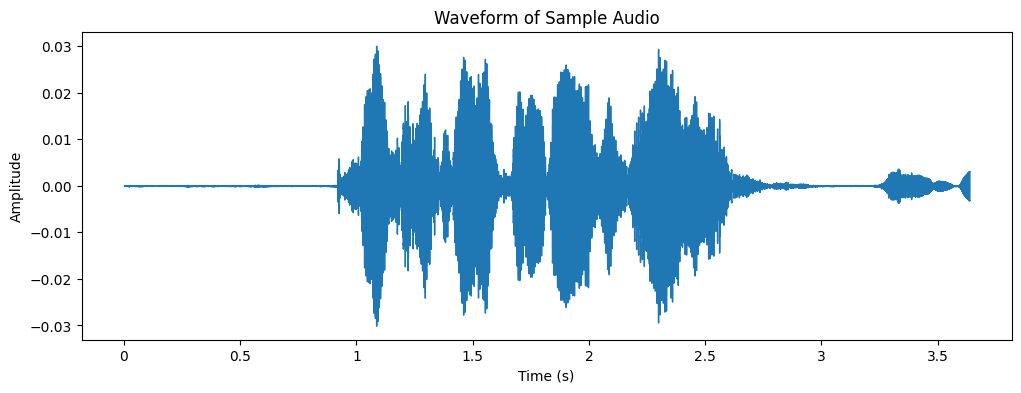

In [ ]:
# Load & Play an Audio File
# 1. load an audio file using librosa
# 2. Visualize the waveform
# 3. Play the audio to verify it's working

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Get the first audio file from the dataset
audio_files = []
for root, _, files in os.walk(data_folder):
    for file in files:
        if file.endswith(".wav"):  # Ensure it's an audio file
            audio_files.append(os.path.join(root, file))

# Select a sample audio file
sample_audio_path = audio_files[0]  # Change index if you want a different file

# Load the audio file
y, sr = librosa.load(sample_audio_path, sr=None)  # Keep original sample rate

# Display audio info
print(f"Sample Rate: {sr} Hz")
print(f"Audio Duration: {len(y)/sr:.2f} seconds")
print(f"File Path: {sample_audio_path}")

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the audio
ipd.Audio(sample_audio_path)


# 2 Data Inspection

In [ ]:
# Extract Labels from Filenames
# 1. Extract emotion labels from filenames
# 2. Create a Dataframe to store file paths & corresponding labels

import pandas as pd

# Emotion mapping from filename convention
emotion_dict = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Prepare dataset list
data = []

In [ ]:
# Loop through dataset directory
for actor in os.listdir(data_folder):
    actor_path = os.path.join(data_folder, actor)

    if os.path.isdir(actor_path):  # Ensure it's a directory
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                parts = file.split("-")

                modality = parts[0]  # Modality (Expecting '03' for audio-only)
                vocal_channel = parts[1]  # Vocal Channel ('01' for speech, '02' for song)
                emotion = emotion_dict.get(parts[2], "unknown")  # Emotion label
                intensity = parts[3]  # Emotional Intensity
                statement = parts[4]  # Statement ID
                repetition = parts[5]  # Repetition ID
                actor_id = int(parts[6].split(".")[0])  # Extract actor ID

                gender = "male" if actor_id % 2 != 0 else "female"  # Determine gender

                # Store information
                data.append([file, os.path.join(actor_path, file), emotion, gender])


In [ ]:
# Create DataFrame
df = pd.DataFrame(data, columns=["Filename", "Filepath", "Emotion", "Gender"])


In [ ]:
# Display dataset overview
print(df.head())
print(f"\nTotal Samples: {len(df)}")

                   Filename  \
0  03-01-03-01-01-01-19.wav   
1  03-01-02-01-01-02-19.wav   
2  03-01-05-01-02-01-19.wav   
3  03-01-06-01-02-01-19.wav   
4  03-01-04-02-01-02-19.wav   

                                            Filepath  Emotion Gender  
0  /content/RAVDESS/Actor_19/03-01-03-01-01-01-19...    happy   male  
1  /content/RAVDESS/Actor_19/03-01-02-01-01-02-19...     calm   male  
2  /content/RAVDESS/Actor_19/03-01-05-01-02-01-19...    angry   male  
3  /content/RAVDESS/Actor_19/03-01-06-01-02-01-19...  fearful   male  
4  /content/RAVDESS/Actor_19/03-01-04-02-01-02-19...      sad   male  

Total Samples: 1440


In [ ]:
# Count of each emotion
print("\nEmotion Distribution:")
print(df["Emotion"].value_counts())


Emotion Distribution:
Emotion
happy        192
calm         192
angry        192
fearful      192
sad          192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64


In [ ]:
# Verify Extracted Labels

# Method 1: print sample data
# manually verify that the filenames match their extracted emotion labels

# Check first few rows
print(df.head(10))

                   Filename  \
0  03-01-03-01-01-01-19.wav   
1  03-01-02-01-01-02-19.wav   
2  03-01-05-01-02-01-19.wav   
3  03-01-06-01-02-01-19.wav   
4  03-01-04-02-01-02-19.wav   
5  03-01-01-01-02-01-19.wav   
6  03-01-02-02-02-02-19.wav   
7  03-01-06-01-02-02-19.wav   
8  03-01-07-02-01-02-19.wav   
9  03-01-04-02-02-01-19.wav   

                                            Filepath  Emotion Gender  
0  /content/RAVDESS/Actor_19/03-01-03-01-01-01-19...    happy   male  
1  /content/RAVDESS/Actor_19/03-01-02-01-01-02-19...     calm   male  
2  /content/RAVDESS/Actor_19/03-01-05-01-02-01-19...    angry   male  
3  /content/RAVDESS/Actor_19/03-01-06-01-02-01-19...  fearful   male  
4  /content/RAVDESS/Actor_19/03-01-04-02-01-02-19...      sad   male  
5  /content/RAVDESS/Actor_19/03-01-01-01-02-01-19...  neutral   male  
6  /content/RAVDESS/Actor_19/03-01-02-02-02-02-19...     calm   male  
7  /content/RAVDESS/Actor_19/03-01-06-01-02-02-19...  fearful   male  
8  /content/RAVDESS

In [ ]:
# Method 2: check specific emotions
# ensure that each emotion is mapped correctly by displaying random samples per emotion

# Display random samples for each emotion
for emotion in df["Emotion"].unique():
    sample = df[df["Emotion"] == emotion].sample(10, random_state=42)  # Select 10 random samples
    print(f"\nEmotion: {emotion}")
    print(sample[["Filename", "Emotion"]])



Emotion: happy
                      Filename Emotion
343   03-01-03-01-02-01-04.wav   happy
1026  03-01-03-02-01-01-07.wav   happy
572   03-01-03-02-02-01-01.wav   happy
1072  03-01-03-02-02-02-07.wav   happy
853   03-01-03-02-01-02-20.wav   happy
1340  03-01-03-01-01-02-18.wav   happy
107   03-01-03-01-02-01-11.wav   happy
129   03-01-03-02-01-02-15.wav   happy
122   03-01-03-01-02-01-15.wav   happy
78    03-01-03-02-02-02-11.wav   happy

Emotion: calm
                      Filename Emotion
354   03-01-02-02-01-01-04.wav    calm
1022  03-01-02-01-01-02-07.wav    calm
570   03-01-02-02-02-02-01.wav    calm
1070  03-01-02-02-01-02-07.wav    calm
846   03-01-02-02-01-01-20.wav    calm
1329  03-01-02-02-02-02-18.wav    calm
118   03-01-02-02-01-02-11.wav    calm
145   03-01-02-02-02-02-15.wav    calm
120   03-01-02-01-02-02-15.wav    calm
62    03-01-02-02-02-01-11.wav    calm

Emotion: angry
                      Filename Emotion
335   03-01-05-02-02-01-04.wav   angry
1020  03-01-05-02

# 3 Data Preprocessing (Part 1)

In [ ]:
import librosa
import soundfile as sf
import os
from tqdm import tqdm  # Progress bar

# Directory where cleaned audio will be stored (optional)
cleaned_audio_dir = "/content/RAVDESS_CLEANED"
os.makedirs(cleaned_audio_dir, exist_ok=True)

# Function to trim silence
def trim_silence(audio_path, save_dir=None):
    # Load audio file
    try:
        y, sr = librosa.load(audio_path, sr=None)  # Preserve original sampling rate
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        return None  # Skip this file if loading fails

    # Trim leading and trailing silence
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)  # Adjust `top_db` to control silence threshold

    # Save or return trimmed audio
    if save_dir:
        filename = os.path.basename(audio_path)
        save_path = os.path.join(save_dir, filename)
        try:
            sf.write(save_path, y_trimmed, sr)
            return save_path  # Return new file path
        except Exception as e:
            print(f"Error saving {save_path}: {e}")
            return None
    else:
        return y_trimmed, sr  # Use in-memory

# Apply trimming to all audio files (using df as the source)
trimmed_filepaths = []
for filepath in tqdm(df["Filepath"], desc="Trimming Silence"):
    cleaned_path = trim_silence(filepath, save_dir=cleaned_audio_dir)
    if cleaned_path:  # Only add the path if trimming was successful
        trimmed_filepaths.append(cleaned_path)

# Update DataFrame with new cleaned filepaths
df["Filepath"] = trimmed_filepaths

print("✅ Silence removed from all audio files!")


Trimming Silence: 100%|██████████| 1440/1440 [00:35<00:00, 40.55it/s]

✅ Silence removed from all audio files!


Sample Rate: 48000 Hz
Audio Duration: 2.67 seconds
File Path: /content/RAVDESS_CLEANED/03-01-03-01-01-01-19.wav


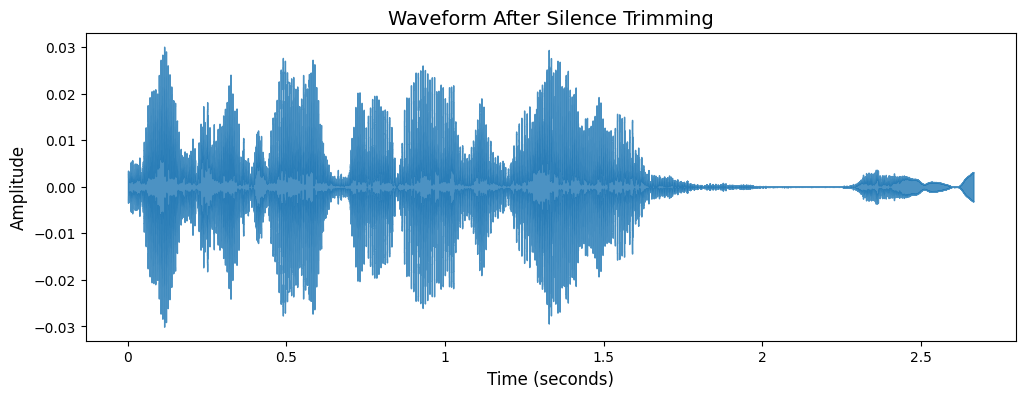

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd  # For audio playback

# Select a sample trimmed audio file from the DataFrame (use the first entry)
sample_audio_path = df["Filepath"].iloc[0]  # Change index if needed

# Load the trimmed audio file
y_trimmed, sr = librosa.load(sample_audio_path, sr=None)  # Keep original sample rate

# Display audio info
print(f"Sample Rate: {sr} Hz")
print(f"Audio Duration: {len(y_trimmed)/sr:.2f} seconds")
print(f"File Path: {sample_audio_path}")

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_trimmed, sr=sr, alpha=0.8)
plt.title("Waveform After Silence Trimming", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.show()

# Play the trimmed audio
ipd.Audio(sample_audio_path)


In [ ]:
# Count of each emotion in the updated DataFrame
print("\nEmotion Distribution:")
print(df["Emotion"].value_counts())



Emotion Distribution:
Emotion
happy        192
calm         192
angry        192
fearful      192
sad          192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64


In [ ]:
import shutil

# Define the path for the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/ITI110/RAVDESS_CLEANED.zip'

# Create a zip file with all cleaned audio files
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', '/content/RAVDESS_CLEANED')

# Verify the zip file has been created
print(f"✅ Dataset zipped and saved to Google Drive at: {zip_file_path}")


✅ Dataset zipped and saved to Google Drive at: /content/drive/My Drive/ITI110/RAVDESS_CLEANED.zip


# 4 Data Preprocessing (Part 2) & Exploratory Data Analaysis
Restart session & Load cleaned dataset

In [ ]:
#Install Required Libraries
!pip install librosa transformers datasets jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7


In [ ]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')
folder = '/content/drive/My Drive/ITI110'

Mounted at /content/drive


In [ ]:
# Unzip the Dataset
import os
import zipfile

# Define the path to the zip file in your Google Drive and where to unzip in Colab's virtual space
zip_file_path = folder + '/RAVDESS_CLEANED.zip'
data_folder = '/content/RAVDESS_CLEANED'  # Virtual Colab space (not on Google Drive)

# Unzipping the dataset into the Colab virtual space
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_folder)

# Now you can access the unzipped data in Colab
print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
# Load Dataset into a DataFrame
import pandas as pd

# Define emotion mapping (same as before)
emotion_dict = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Load files into a DataFrame
data = []
for file in os.listdir(data_folder):
    if file.endswith(".wav"):
        parts = file.split("-")
        emotion = emotion_dict.get(parts[2], "unknown")  # Extract emotion label
        actor_id = int(parts[6].split(".")[0])  # Extract actor ID
        gender = "male" if actor_id % 2 != 0 else "female"  # Determine gender

        data.append([file, os.path.join(data_folder, file), emotion, gender])

# Create DataFrame
df = pd.DataFrame(data, columns=["Filename", "Filepath", "Emotion", "Gender"])


In [ ]:
# Print dataset summary
print(df.head())
print(f"\nTotal Samples: {len(df)}")

                   Filename  \
0  03-01-04-01-02-02-06.wav   
1  03-01-03-01-01-01-19.wav   
2  03-01-08-01-01-01-09.wav   
3  03-01-05-02-01-02-07.wav   
4  03-01-04-02-01-01-07.wav   

                                            Filepath    Emotion  Gender  
0  /content/RAVDESS_CLEANED/03-01-04-01-02-02-06.wav        sad  female  
1  /content/RAVDESS_CLEANED/03-01-03-01-01-01-19.wav      happy    male  
2  /content/RAVDESS_CLEANED/03-01-08-01-01-01-09.wav  surprised    male  
3  /content/RAVDESS_CLEANED/03-01-05-02-01-02-07.wav      angry    male  
4  /content/RAVDESS_CLEANED/03-01-04-02-01-01-07.wav        sad    male  

Total Samples: 1440


In [ ]:
# Count of each emotion
print("\nEmotion Distribution:")
print(df["Emotion"].value_counts())


Emotion Distribution:
Emotion
sad          192
happy        192
surprised    192
angry        192
calm         192
disgust      192
fearful      192
neutral       96
Name: count, dtype: int64


In [ ]:
# resolve unbalanced data (neutral)
# neutral emotion has only 96 samples, while other classes have 192 samples.
# we need to balance the dataset by two possible approaches
# 1. Oversampling (Duplicate Neutral Samples) → Increase neutral samples to 192 by duplicating existing ones.
# 2. Data Augmentation → Generate new variations of neutral audio using transformations (e.g., noise addition, pitch shift).
# For now, let's oversample the neutral class to quickly balance the dataset.

In [ ]:
# Solution: Oversampling Neutral Samples
# we'll randomly duplicate neutral samples to match 192 samples

from sklearn.utils import resample

# Separate majority and minority class
df_majority = df[df["Emotion"] != "neutral"]  # All other emotions
df_minority = df[df["Emotion"] == "neutral"]  # Only "neutral"

# Oversample the minority class to match 192 samples
df_neutral_oversampled = resample(df_minority,
                                  replace=True,  # Allow resampling with replacement
                                  n_samples=192,  # Match majority class count
                                  random_state=42)  # Reproducibility

# Combine the oversampled neutral data with the rest of the dataset
df_balanced = pd.concat([df_majority, df_neutral_oversampled])

# Shuffle dataset to mix the oversampled samples
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify new class distribution
print("\nBalanced Emotion Distribution:")
print(df_balanced["Emotion"].value_counts())
print(f"\nTotal Samples: {len(df_balanced)}")



Balanced Emotion Distribution:
Emotion
calm         192
sad          192
surprised    192
neutral      192
disgust      192
angry        192
happy        192
fearful      192
Name: count, dtype: int64

Total Samples: 1536


<ipython-input-8-0d187e0bbc06>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_balanced["Emotion"].value_counts().index,


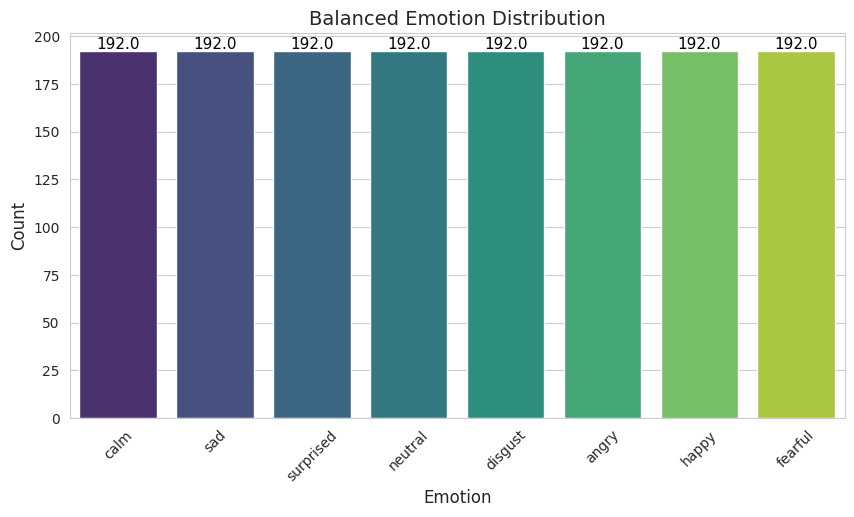

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Create bar plot
ax = sns.barplot(x=df_balanced["Emotion"].value_counts().index,
                 y=df_balanced["Emotion"].value_counts().values,
                 palette="viridis")

# Add labels to bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

# Customize plot
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Balanced Emotion Distribution", fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Label Mapping to Emotions

# Define emotion mapping to three categories
emotion_mapping = {
    "neutral": "neutral",
    "calm": "neutral",
    "happy": "positive",
    "surprised": "positive",
    "sad": "negative",
    "disgust": "negative",
    "angry": "negative",
    "fearful": "negative"
}

# Create a new dataframe with mapped labels
df_map = df_balanced.copy()  # Copy existing dataframe to avoid modifying the original
df_map["Label"] = df_map["Emotion"].map(emotion_mapping)  # Map emotions to new labels

# Select and rename required columns
df_map = df_map[["Filename", "Filepath", "Emotion", "Gender", "Label"]]


In [ ]:
# Print dataset summary
print(df_map.head())
print(f"\nTotal Samples: {len(df_map)}")


                   Filename  \
0  03-01-02-02-01-01-08.wav   
1  03-01-04-02-02-02-24.wav   
2  03-01-02-02-01-02-22.wav   
3  03-01-08-01-02-01-13.wav   
4  03-01-01-01-02-02-11.wav   

                                            Filepath    Emotion  Gender  \
0  /content/RAVDESS_CLEANED/03-01-02-02-01-01-08.wav       calm  female   
1  /content/RAVDESS_CLEANED/03-01-04-02-02-02-24.wav        sad  female   
2  /content/RAVDESS_CLEANED/03-01-02-02-01-02-22.wav       calm  female   
3  /content/RAVDESS_CLEANED/03-01-08-01-02-01-13.wav  surprised    male   
4  /content/RAVDESS_CLEANED/03-01-01-01-02-02-11.wav    neutral    male   

      Label  
0   neutral  
1  negative  
2   neutral  
3  positive  
4   neutral  

Total Samples: 1536


In [ ]:
# Check class distribution after mapping
print("\nLabel Distribution:")
print(df_map["Label"].value_counts())



Label Distribution:
Label
negative    768
neutral     384
positive    384
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Define target sample size per label
target_samples = 384

# Create an empty list to store undersampled data
undersampled_data = []

# Perform stratified undersampling within each Label
for label in df_map["Label"].unique():
    df_label = df_map[df_map["Label"] == label]  # Filter by label

    # Perform stratified undersampling by emotion within each label
    df_label_balanced = df_label.groupby("Emotion", group_keys=False).apply(
        lambda x: x.sample(min(len(x), target_samples // df_label["Emotion"].nunique()), random_state=42)
    ).reset_index(drop=True)  # Reset index after grouping

    undersampled_data.append(df_label_balanced)

# Combine undersampled data into a new dataframe
df_BalMap = pd.concat(undersampled_data).reset_index(drop=True)

# Print new distribution
print("\nBalanced Label Distribution:")
print(df_BalMap["Label"].value_counts())



Balanced Label Distribution:
Label
neutral     384
negative    384
positive    384
Name: count, dtype: int64


<ipython-input-12-a815882248d0>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_label_balanced = df_label.groupby("Emotion", group_keys=False).apply(
<ipython-input-12-a815882248d0>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_label_balanced = df_label.groupby("Emotion", group_keys=False).apply(
<ipython-input-12-a815882248d0>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the group

In [ ]:
# Verify class balance within each Label
print("\nEmotion Count per Label:")
print(df_BalMap.groupby(["Label", "Emotion"]).size())



Emotion Count per Label:
Label     Emotion  
negative  angry         96
          disgust       96
          fearful       96
          sad           96
neutral   calm         192
          neutral      192
positive  happy        192
          surprised    192
dtype: int64


In [ ]:
# Display first few rows
print(df_BalMap.head())


                   Filename  \
0  03-01-02-02-01-02-06.wav   
1  03-01-02-01-01-02-16.wav   
2  03-01-02-01-01-01-01.wav   
3  03-01-02-01-02-01-04.wav   
4  03-01-02-01-02-02-03.wav   

                                            Filepath Emotion  Gender    Label  
0  /content/RAVDESS_CLEANED/03-01-02-02-01-02-06.wav    calm  female  neutral  
1  /content/RAVDESS_CLEANED/03-01-02-01-01-02-16.wav    calm  female  neutral  
2  /content/RAVDESS_CLEANED/03-01-02-01-01-01-01.wav    calm    male  neutral  
3  /content/RAVDESS_CLEANED/03-01-02-01-02-01-04.wav    calm  female  neutral  
4  /content/RAVDESS_CLEANED/03-01-02-01-02-02-03.wav    calm    male  neutral  


<ipython-input-15-06eaac542e84>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_BalMap["Label"].value_counts().index,


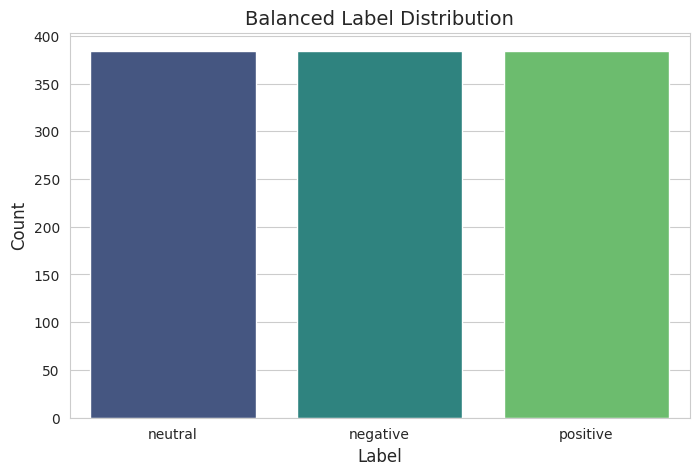

In [ ]:
# First plot – Shows the balanced Label distribution (Positive, Negative, Neutral).

#import matplotlib.pyplot as plt
#import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
sns.barplot(x=df_BalMap["Label"].value_counts().index,
            y=df_BalMap["Label"].value_counts().values,
            palette="viridis")

# Customize plot
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Balanced Label Distribution", fontsize=14)
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()


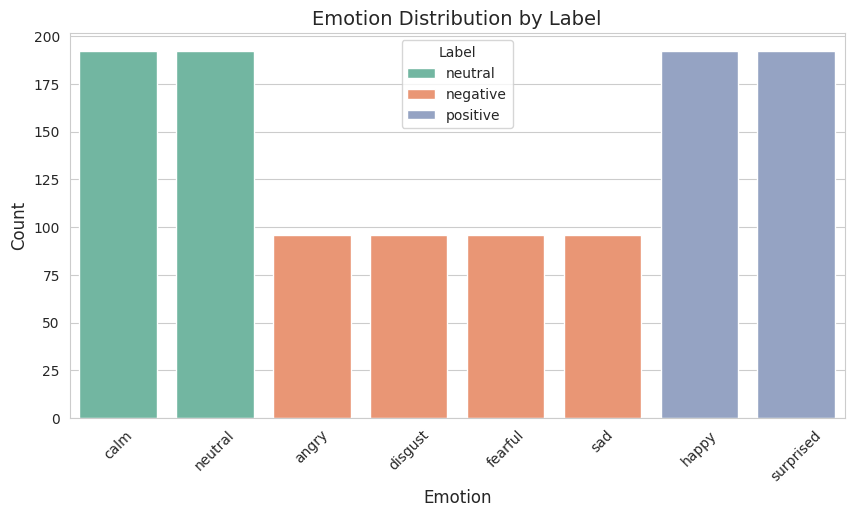

In [ ]:
# Second plot – Shows the count of Emotion within each Label category.

plt.figure(figsize=(10, 5))
sns.countplot(data=df_BalMap, x="Emotion", hue="Label", palette="Set2")

# Customize plot
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Emotion Distribution by Label", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Label")
plt.show()


In [ ]:
# Determine average, minimum, and maximum audio duration values
# run this

import librosa
import numpy as np

# List to store durations
durations = []

# Iterate through all audio files in df_BalMap
for path in df_BalMap['Filepath']:
    data, sr = librosa.load(path, sr=None)  # Keep the original sampling rate
    duration = len(data) / sr  # Calculate duration in seconds
    durations.append(duration)

# Convert to NumPy array for calculations
durations = np.array(durations)

# Get statistics
average_duration = np.mean(durations)
min_duration = np.min(durations)
max_duration = np.max(durations)

# Print results
print(f"Average Audio Length: {average_duration:.2f} seconds")
print(f"Minimum Audio Length: {min_duration:.2f} seconds")
print(f"Maximum Audio Length: {max_duration:.2f} seconds")


Average Audio Length: 1.64 seconds
Minimum Audio Length: 0.80 seconds
Maximum Audio Length: 3.34 seconds


In [ ]:
# # Calculate Audio Length & Compute Average Duration

# import librosa

# # Calculate the duration of each audio file
# audio_durations = []

# for file_path in df_BalMap["Filepath"]:
#     y, sr = librosa.load(file_path, sr=None)  # Load the audio file
#     duration = librosa.get_duration(y=y, sr=sr)  # Get the duration in seconds
#     audio_durations.append(duration)

# # Calculate the average duration
# average_duration = sum(audio_durations) / len(audio_durations)

# print(f"Average Audio Length: {average_duration:.2f} seconds")


Average Audio Length: 1.64 seconds


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# 1. Display the Spectrogram
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)  # Process data for spectrogram
    xdb = librosa.amplitude_to_db(abs(x))  # Converting the file to decibels
    plt.figure(figsize=(10, 4))
    plt.title(f"Spectrogram - {emotion}", size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# 2. Display the Waveform (Wave plot)
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform - {emotion}", size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# 3. Display the waveform, spectrogram, and play the audio for a given emotion and gender
def display_audio_info(df, emotion, gender):
    # Filter the dataframe based on emotion and gender
    sample = df_BalMap[(df_BalMap['Emotion'] == emotion) & (df_BalMap['Gender'] == gender)].iloc[0]

    # Load the audio file
    path = sample['Filepath']
    data, sr = librosa.load(path)

    # Display the waveform
    waveplot(data, sr, emotion)

    # Display the spectrogram
    spectrogram(data, sr, emotion)

    # Play the audio
    return Audio(path)


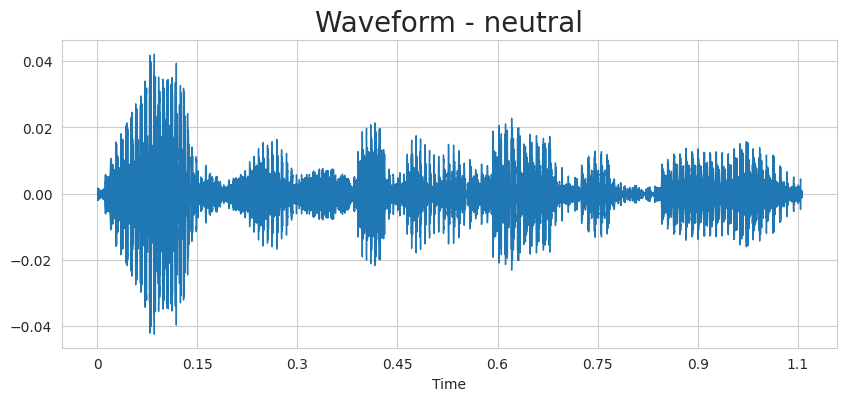

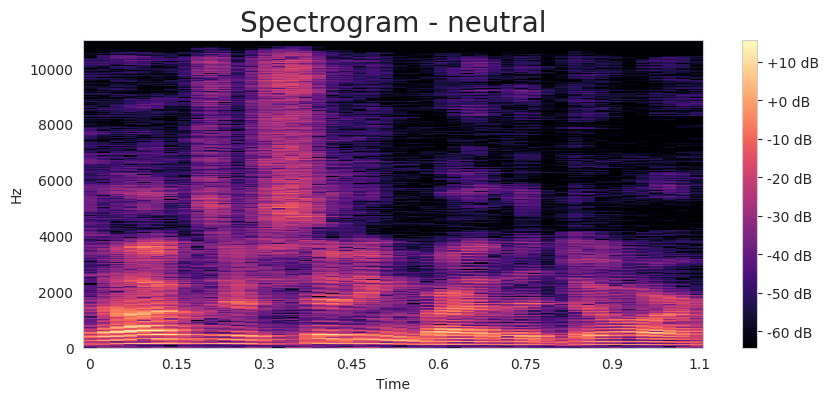

In [ ]:
# Example: Let's sample "neutral" emotion and "male" gender
emotion = 'neutral'
gender = 'male'
display_audio_info(df_BalMap, emotion, gender)  # This will display plots and play the audio


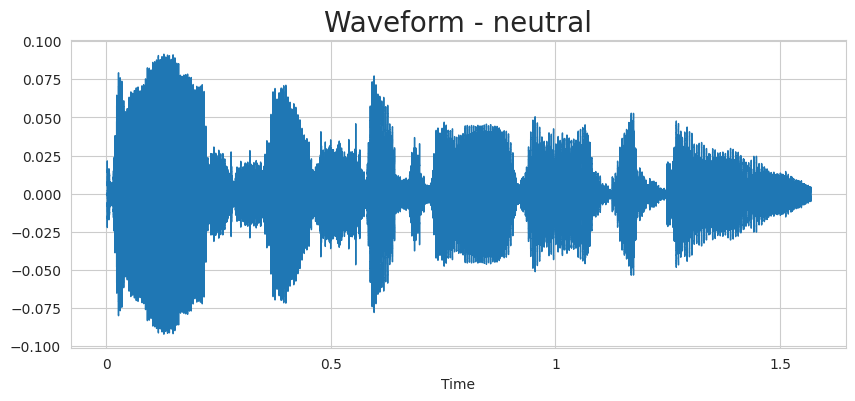

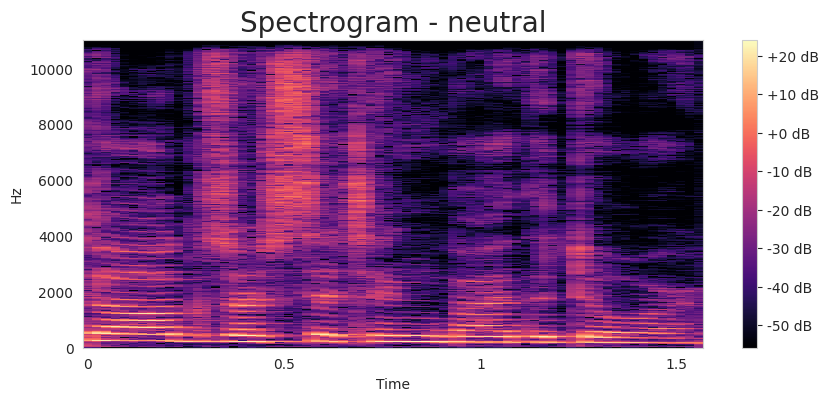

In [ ]:
# Example: Let's sample "neutral" emotion and "female" gender
emotion = 'neutral'
gender = 'female'
display_audio_info(df_BalMap, emotion, gender)  # This will display plots and play the audio


In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from IPython.display import Audio

# 1. Function to display spectrogram
def spectrogram(data, sr, emotion, ax):
    x = librosa.stft(data)  # Process data for spectrogram
    xdb = librosa.amplitude_to_db(abs(x))  # Convert the file to decibels
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax)
    ax.set_title(f"Spectrogram - {emotion}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")

# 2. Function to display the waveform
def waveplot(data, sr, emotion, ax):
    librosa.display.waveshow(data, sr=sr, ax=ax)
    ax.set_title(f"Waveplot - {emotion}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, len(data)/sr)

# 3. Function to plot both waveform and spectrogram for male and female separately
def collective_plot(df_BalMap, emotion):
    # Set up the figure with two subplots (one for male and one for female)
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # Filter the dataframe based on emotion and gender
    male_sample = df_BalMap[(df_BalMap['Emotion'] == emotion) & (df_BalMap['Gender'] == 'male')].iloc[0]
    female_sample = df_BalMap[(df_BalMap['Emotion'] == emotion) & (df_BalMap['Gender'] == 'female')].iloc[0]

    # Load the male audio
    male_path = male_sample['Filepath']
    male_data, male_sr = librosa.load(male_path)

    # Load the female audio
    female_path = female_sample['Filepath']
    female_data, female_sr = librosa.load(female_path)

    # Plot for Male (Top Left)
    waveplot(male_data, male_sr, f"Male - {emotion}", ax[0, 0])

    # Plot the Male Spectrogram (Bottom Left)
    spectrogram(male_data, male_sr, f"Male - {emotion}", ax[1, 0])

    # Plot for Female (Top Right)
    waveplot(female_data, female_sr, f"Female - {emotion}", ax[0, 1])

    # Plot the Female Spectrogram (Bottom Right)
    spectrogram(female_data, female_sr, f"Female - {emotion}", ax[1, 1])

    plt.tight_layout()
    plt.show()


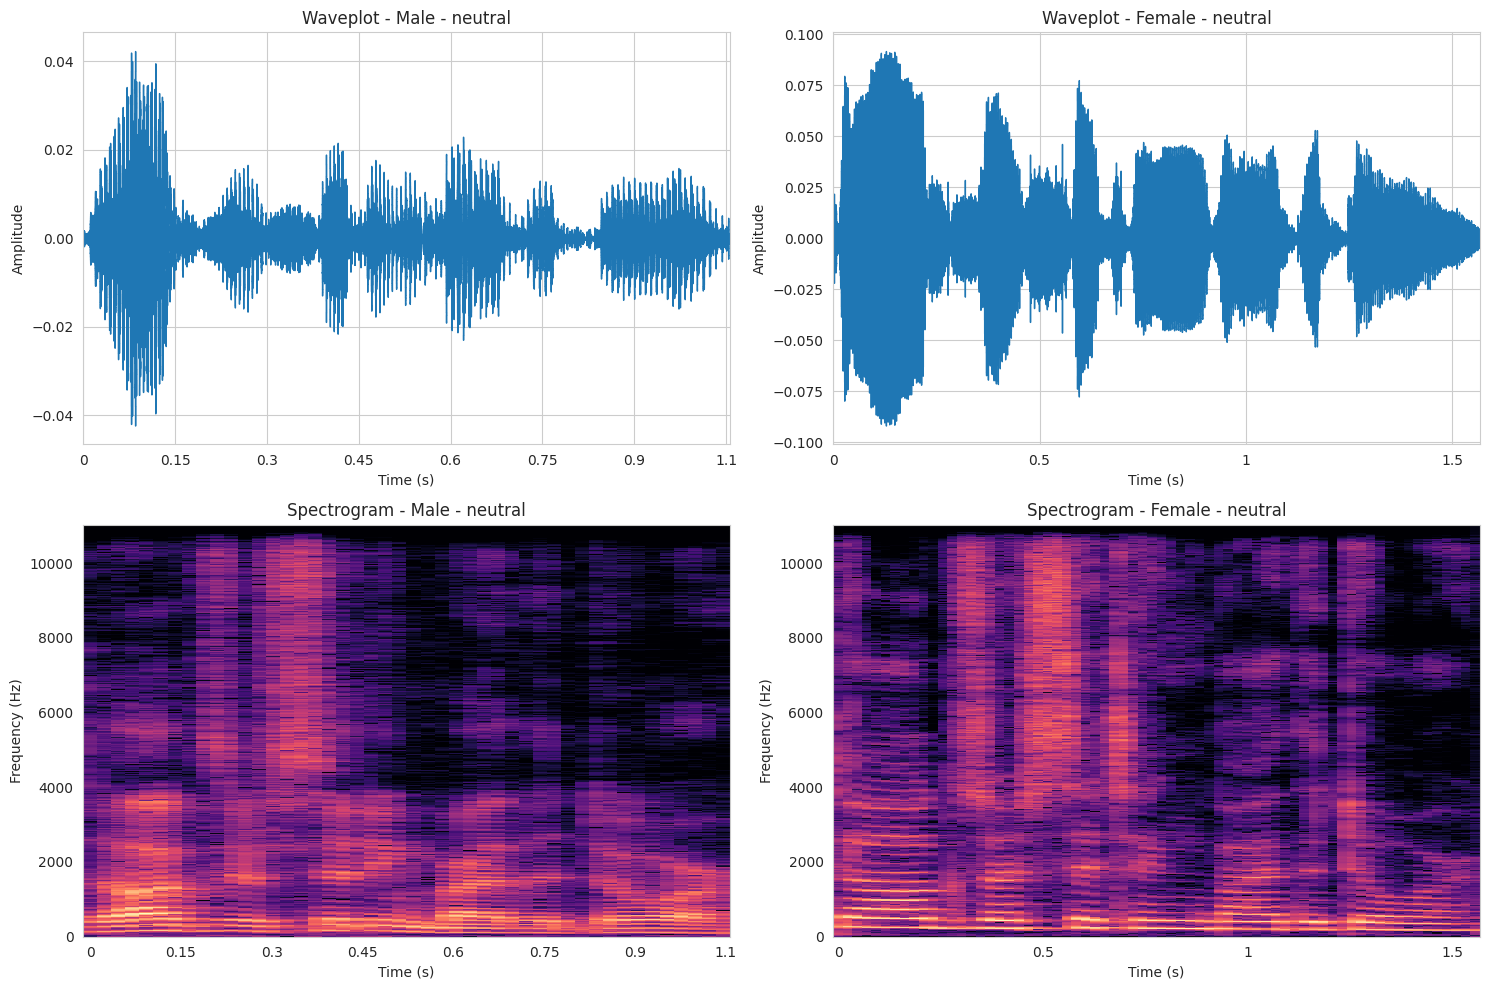

In [ ]:
# Example: Plot "neutral" emotion for male and female
emotion = 'neutral'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


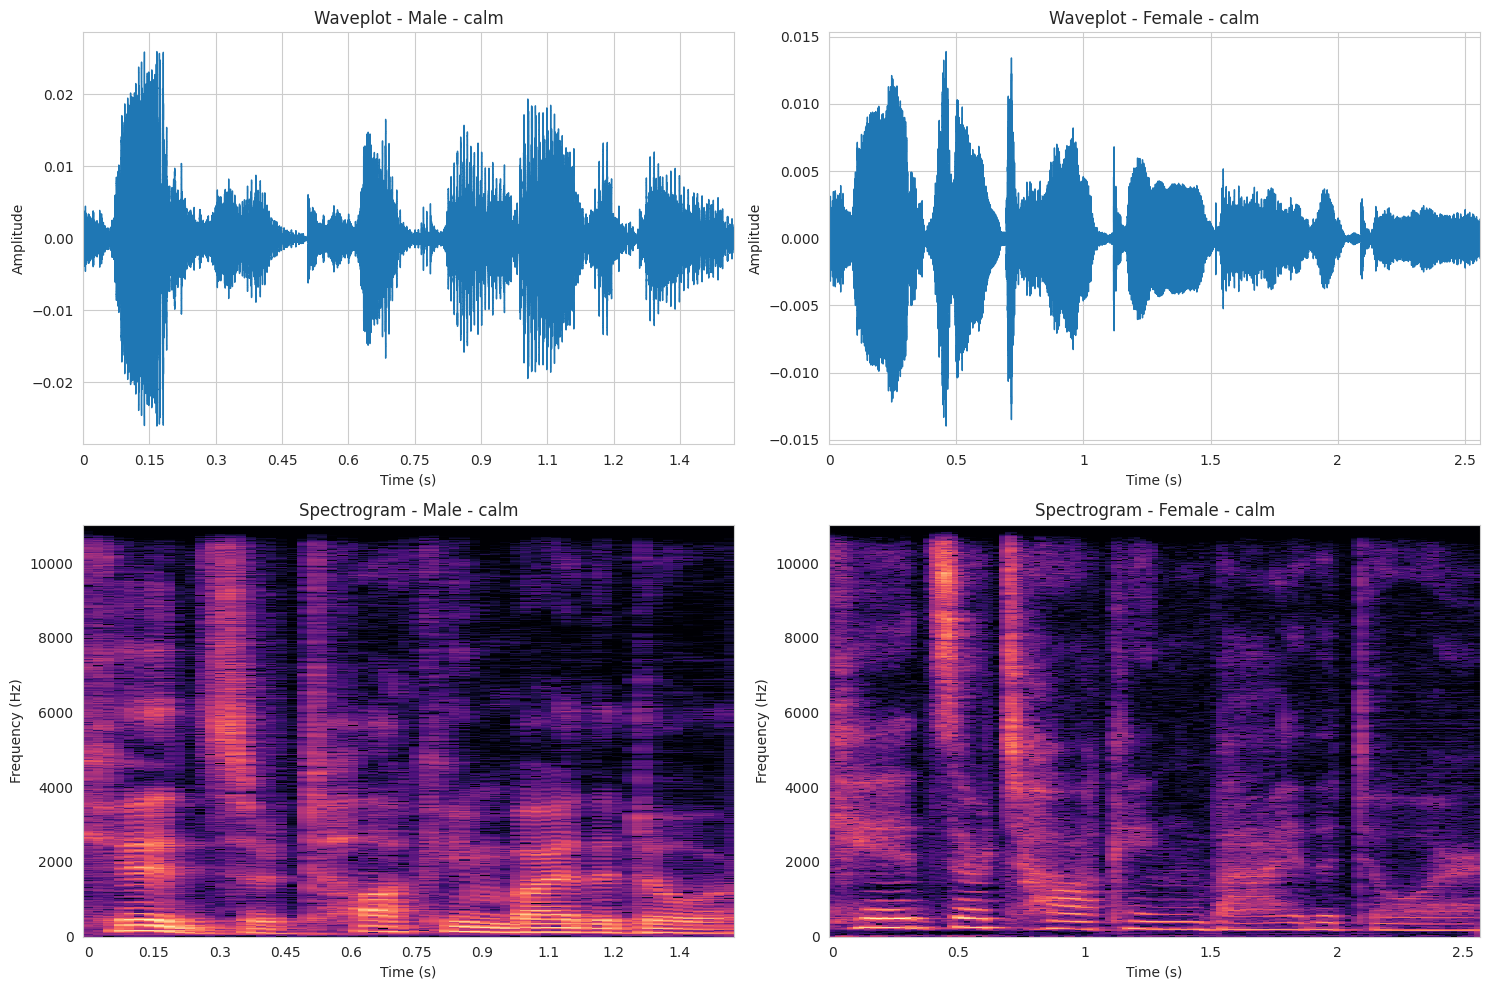

In [ ]:
# Example: Plot "calm" emotion for male and female
emotion = 'calm'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


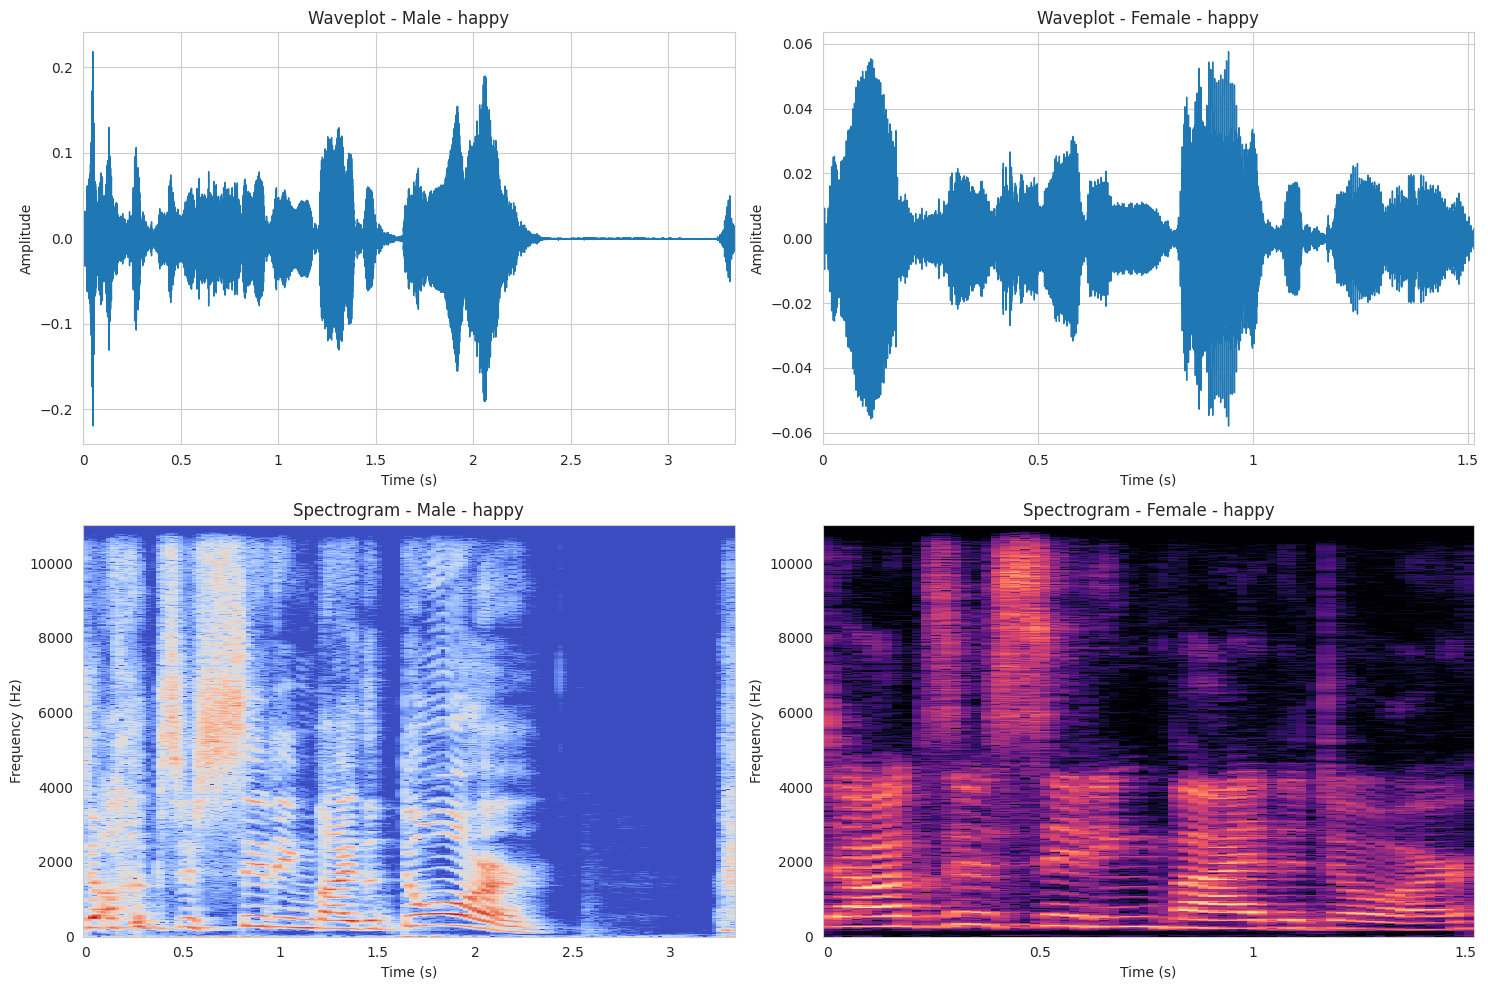

In [ ]:
# Example: Plot "happy" emotion for male and female
emotion = 'happy'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


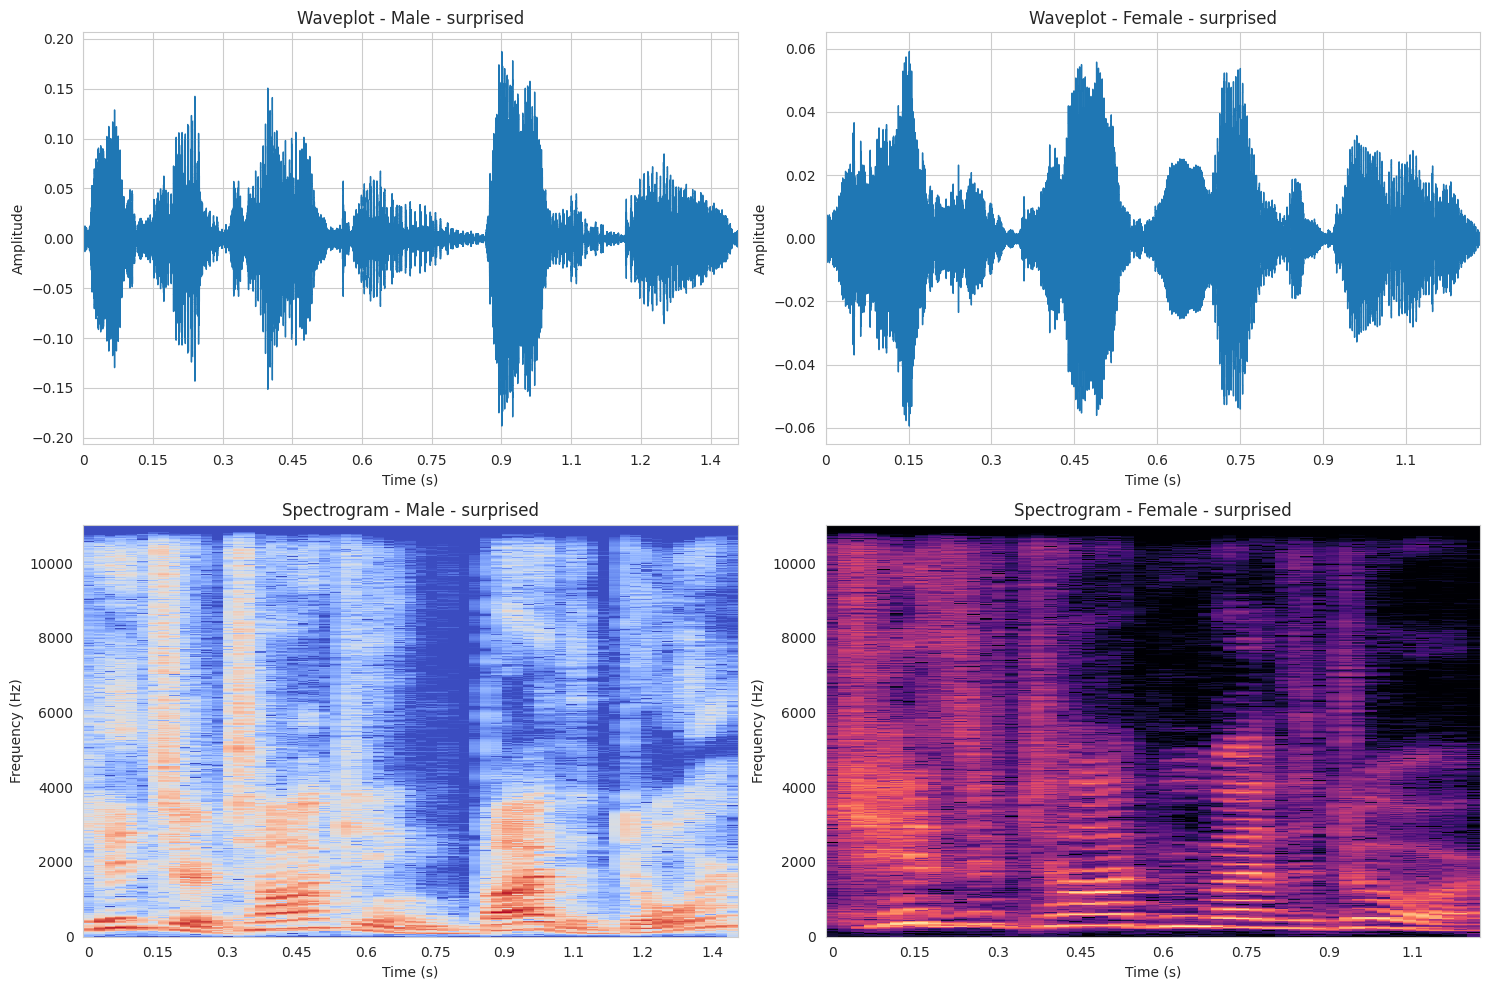

In [ ]:
# Example: Plot "surprised" emotion for male and female
emotion = 'surprised'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


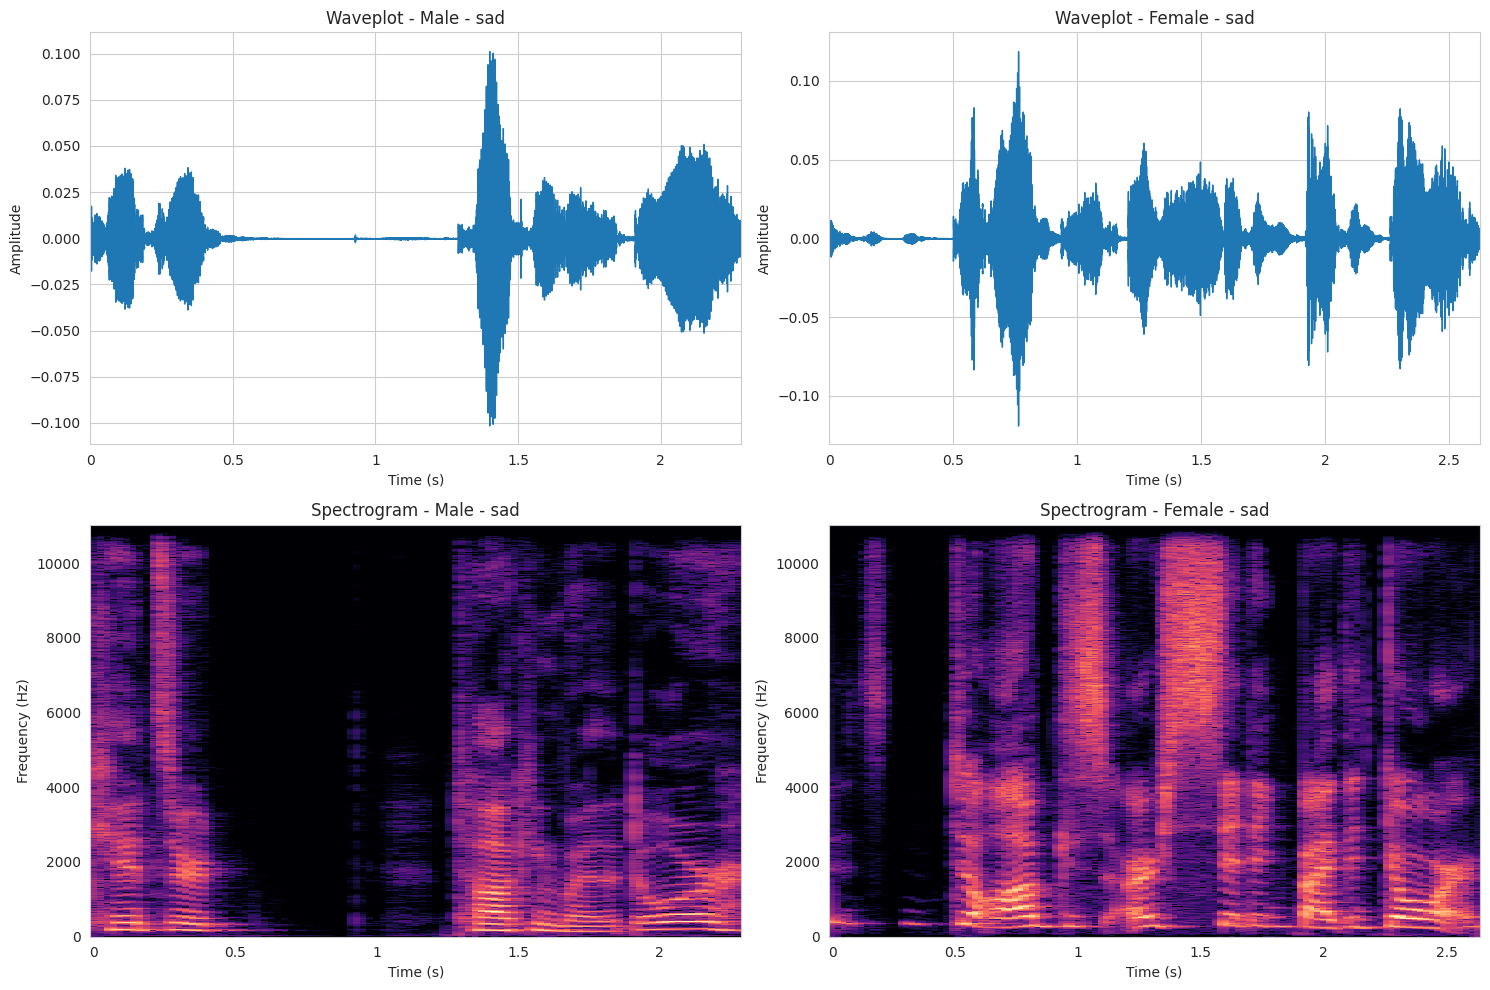

In [ ]:
# Example: Plot "sad" emotion for male and female
emotion = 'sad'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


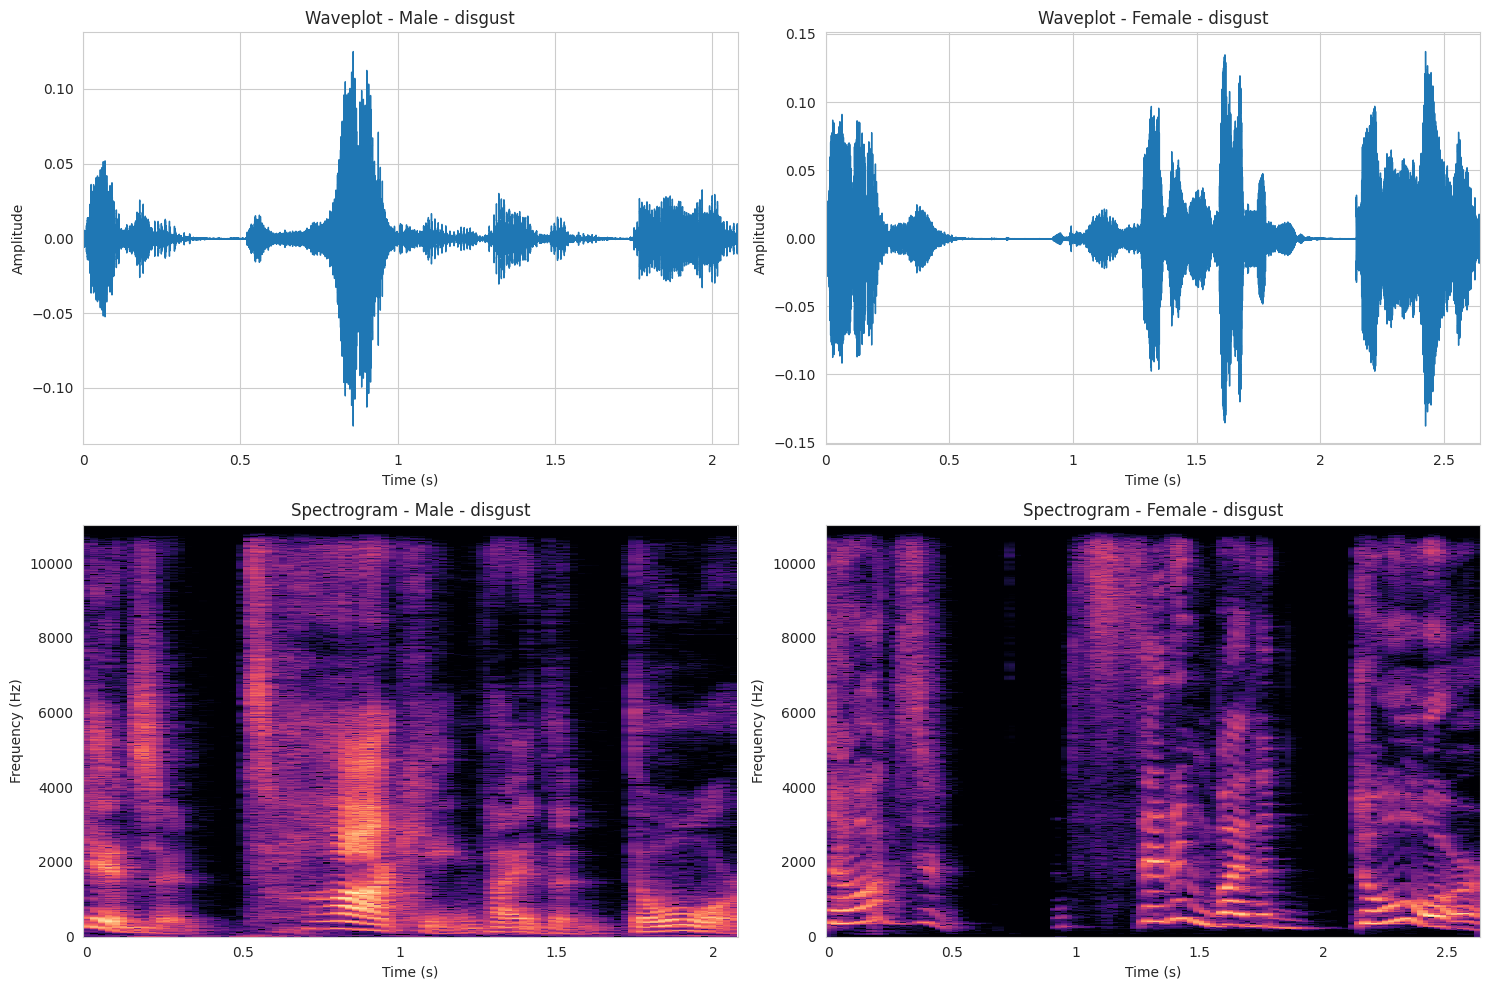

In [ ]:
# Example: Plot "disgust" emotion for male and female
emotion = 'disgust'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


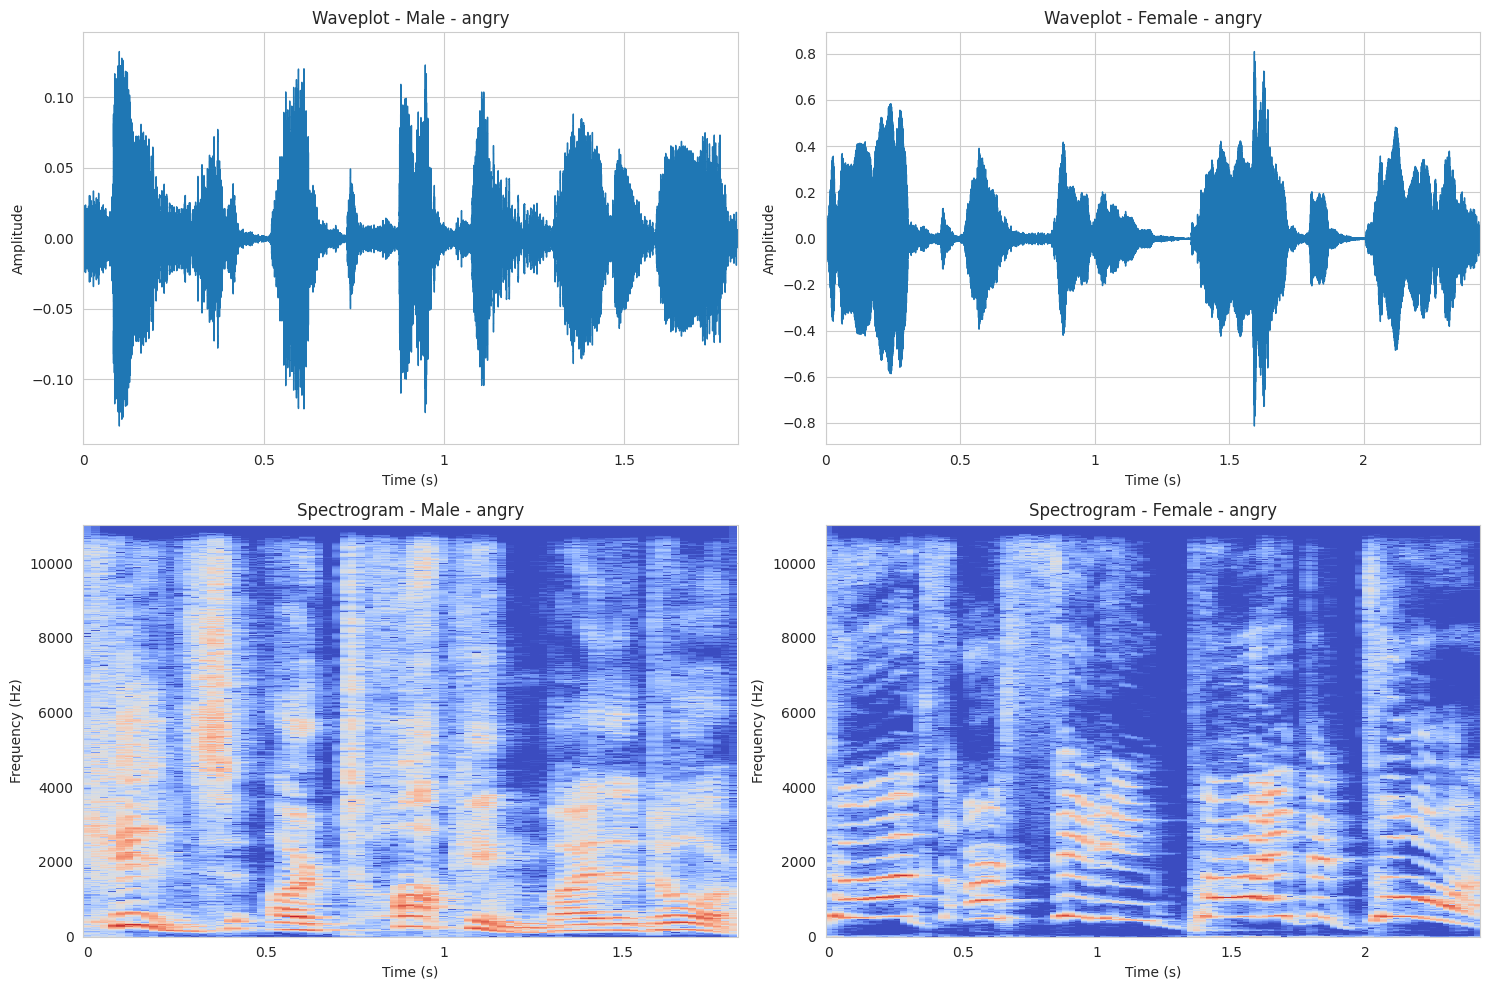

In [ ]:
# Example: Plot "angry" emotion for male and female
emotion = 'angry'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


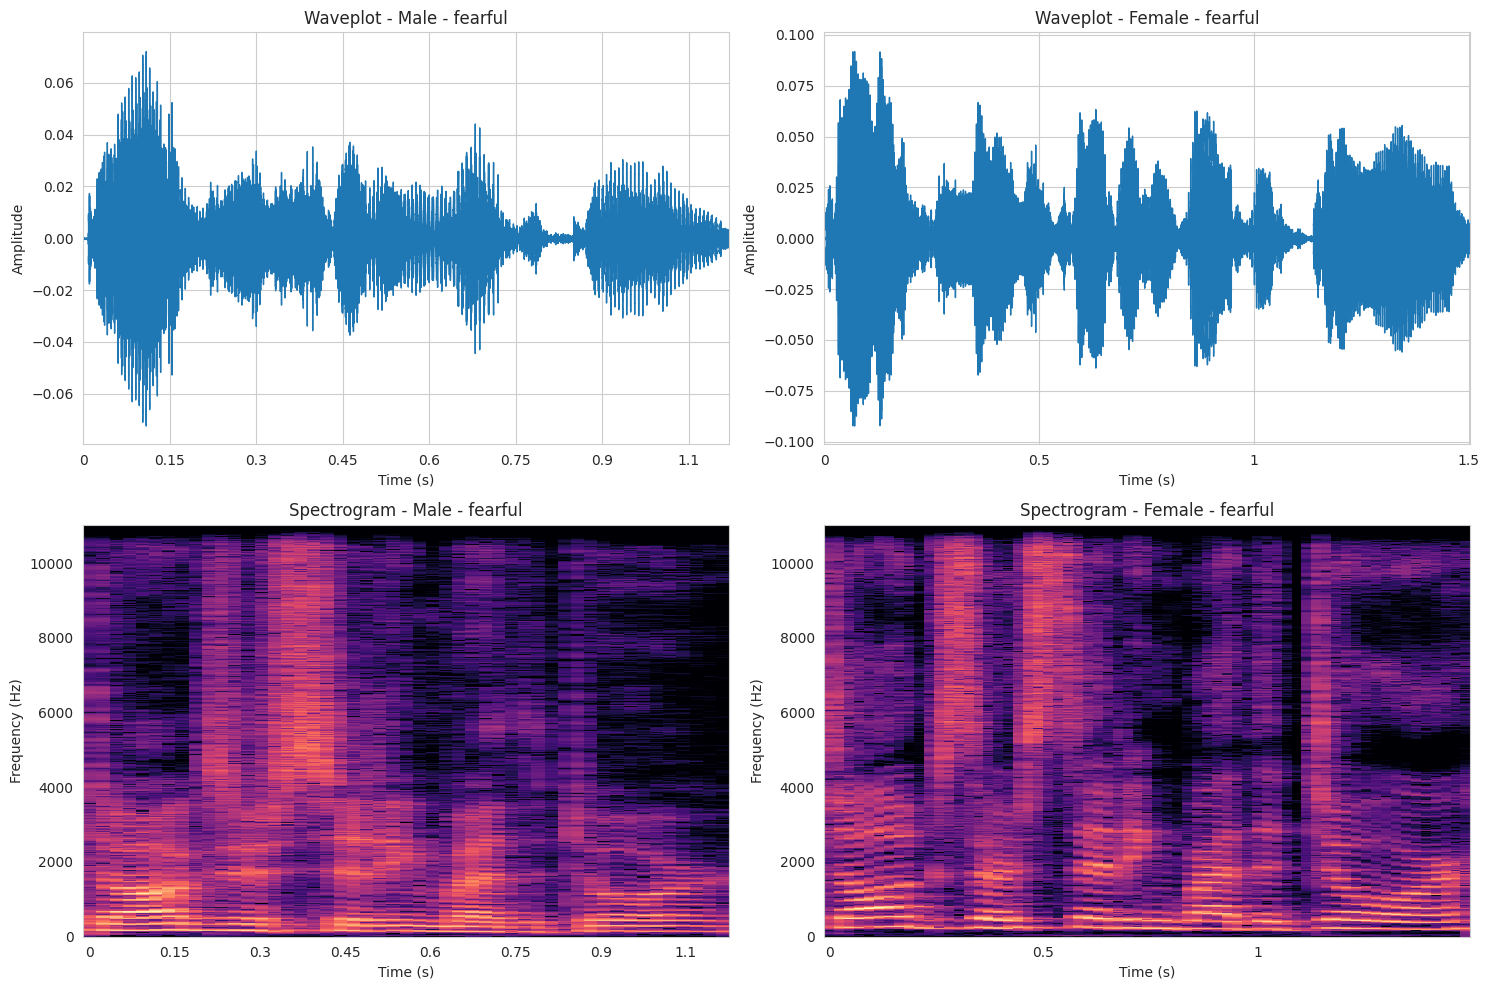

In [ ]:
# Example: Plot "fearful" emotion for male and female
emotion = 'fearful'
collective_plot(df_BalMap, emotion)  # This will display the waveform and spectrograms for both male and female


# 5 Feature Extraction

## Reasoning for extra preprocessing before feature extraction

Padding & Truncation Rules

Since dataset has an average length of 1.64 sec, with a min of 0.80 sec and max of 3.34 sec, it's best to standardize audio length for feature extraction:


1.   Target Duration: 2 seconds (covers most samples while minimizing truncation).
2.   Resampling: Convert all audio files to 16kHz (if not already).
3.   Padding/Truncation Approach:
    - If the audio is shorter than 2 sec: Pad with zeros at the end.
    - If the audio is longer than 2 sec: Truncate to 2 sec.




MFCC & Spectrogram Extraction Plan

extract MFCC and Spectrogram features and save them into .npy files. Steps for Feature Extraction:


1.   Load and resample each .wav file to 16kHz.
2.   Pad/Truncate audio to 2 seconds (which means 32,000 samples at 16kHz).
3.   Extract MFCC features:
    - Use 13 or 40 MFCC coefficients.
    - Apply frame-wise extraction (e.g., 25ms window, 10ms stride).
4.   Extract Spectrogram features:
    - Compute Mel Spectrogram with librosa.feature.melspectrogram().
5.   Save extracted features:
    - x_mfcc.npy → MFCC features
    - x_spec.npy → Spectrogram features
    - y.npy → Corresponding labels from df_BalMap


## MFCCs & Spectrogram

In [ ]:
import numpy as np
import librosa
import librosa.display
import os
from tqdm import tqdm

# Define parameters
TARGET_SR = 16000  # Fixed Sampling Rate (16kHz)
TARGET_DURATION = 2.0  # Fixed duration in seconds
TARGET_SAMPLES = int(TARGET_SR * TARGET_DURATION)  # 32000 samples

# Extract Features
mfcc_features = []
spec_features = []
labels = []

# Process each audio file
for index, row in tqdm(df_BalMap.iterrows(), total=len(df_BalMap)):
    file_path = row['Filepath']
    label = row['Label']

    # Load audio
    data, sr = librosa.load(file_path, sr=TARGET_SR)  # Resample to 16kHz

    # Pad/Truncate audio to 2 seconds (32000 samples)
    if len(data) < TARGET_SAMPLES:
        data = np.pad(data, (0, TARGET_SAMPLES - len(data)), mode='constant')
    else:
        data = data[:TARGET_SAMPLES]

    # ---- MFCC Extraction ----
    mfcc = librosa.feature.mfcc(y=data, sr=TARGET_SR, n_mfcc=40)  # (40, time_frames)
    mfcc_features.append(mfcc)

    # ---- Spectrogram Extraction ----
    spectrogram = librosa.feature.melspectrogram(y=data, sr=TARGET_SR, n_mels=128)  # (128, time_frames)
    spec_features.append(spectrogram)

    # Store labels
    labels.append(label)

# Convert to NumPy arrays
x_mfcc = np.array(mfcc_features)  # Shape: (num_samples, 40, time_frames)
x_spec = np.array(spec_features)  # Shape: (num_samples, 128, time_frames)
y = np.array(labels)  # Labels


100%|██████████| 1152/1152 [00:32<00:00, 35.03it/s]


In [ ]:
# Save as .npy files
np.save("x_mfcc.npy", x_mfcc)
np.save("x_spec.npy", x_spec)
np.save("y.npy", y)

print("✅ Feature extraction complete! Files saved as 'x_mfcc.npy', 'x_spec.npy', and 'y.npy'.")


✅ Feature extraction complete! Files saved as 'x_mfcc.npy', 'x_spec.npy', and 'y.npy'.


In [ ]:
# Verify data integrity
x_mfcc.shape, x_spec.shape, y.shape


((1152, 40, 63), (1152, 128, 63), (1152,))

In [ ]:
# # Load the saved .npy files later when needed
# x_mfcc = np.load("x_mfcc.npy")
# x_spec = np.load("x_spec.npy")
# y = np.load("y.npy")

# 6 Train, Test, Validate of CNN model (with LSTM) - baseline

In [ ]:
!pip install tensorflow numpy matplotlib scikit-learn

In [ ]:
pip install wandb

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
folder = '/content/drive/My Drive/ITI110'

Mounted at /content/drive


In [ ]:
# Unzip the Dataset
import os
import zipfile

# Define the path to the zip file in your Google Drive and where to unzip in Colab's virtual space
zip_file_path = folder + '/RAVDESS_FeatureExtraction.zip'
data_folder = '/content/RAVDESS_FE/'  # Virtual Colab space (not on Google Drive)

# Unzipping the dataset into the Colab virtual space
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_folder)

# Now you can access the unzipped data in Colab
print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
# Import Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, TimeDistributed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# Load the Feature data (.npy files)

# Load the extracted feature datasets
x_mfcc = np.load(f"{data_folder}audio_FeatureExtraction/x_mfcc.npy")
x_spec = np.load(f"{data_folder}audio_FeatureExtraction/x_spec.npy")
y = np.load(f"{data_folder}audio_FeatureExtraction/y.npy")

# Verify the shape of the loaded data
print("MFCC Features Shape:", x_mfcc.shape)  # (samples, time, features)
print("Spectrogram Features Shape:", x_spec.shape)  # (samples, freq_bins, time)
print("Labels Shape:", y.shape)  # (samples,)

MFCC Features Shape: (1152, 40, 63)
Spectrogram Features Shape: (1152, 128, 63)
Labels Shape: (1152,)


In [ ]:
# Check GPU Availibility
print("GPU Available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [ ]:
# Splitting to train, validation, test dataset.
# Take 2 samples for final testing from original 1152 dataset samples
# We'll randomly sample 2 indices from x_mfcc and remove them from the training set.

import numpy as np
from sklearn.model_selection import train_test_split

# Randomly select 2 samples for testing
np.random.seed(42)  # For reproducibility
test_indices = np.random.choice(len(x_mfcc), 2, replace=False)

# Create test set
x_mfcc_test = x_mfcc[test_indices]
x_spec_test = x_spec[test_indices]
y_test = y[test_indices]

# Remove these samples from the dataset
#mask = np.ones(len(x_mfcc), dtype=bool)
mask = np.ones(x_mfcc.shape[0], dtype=bool)
mask[test_indices] = False

x_mfcc_remaining = x_mfcc[mask]
x_spec_remaining = x_spec[mask]
y_remaining = y[mask]

print("Test Set - MFCC:", x_mfcc_test.shape, "| Spectrogram:", x_spec_test.shape, "| Labels:", y_test.shape)
print("Remaining Samples for Train/Validation:", x_mfcc_remaining.shape, y_remaining.shape)


Test Set - MFCC: (2, 40, 63) | Spectrogram: (2, 128, 63) | Labels: (2,)
Remaining Samples for Train/Validation: (1150, 40, 63) (1150,)


In [ ]:
# Split the remaining data (70-30)
# Now that we have 1150 samples left, let's split them into train (70%) and validation (30%).

# 70-30 Split
x_mfcc_train, x_mfcc_val, x_spec_train, x_spec_val, y_train, y_val = train_test_split(
    x_mfcc_remaining, x_spec_remaining, y_remaining, test_size=0.3, random_state=42, stratify=y_remaining
)

print("Train Set - MFCC:", x_mfcc_train.shape, "| Spectrogram:", x_spec_train.shape, "| Labels:", y_train.shape)
print("Validation Set - MFCC:", x_mfcc_val.shape, "| Spectrogram:", x_spec_val.shape, "| Labels:", y_val.shape)


Train Set - MFCC: (805, 40, 63) | Spectrogram: (805, 128, 63) | Labels: (805,)
Validation Set - MFCC: (345, 40, 63) | Spectrogram: (345, 128, 63) | Labels: (345,)


## Model 1

In [ ]:
# Define CNN-LSTM Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, LSTM, Dense, Reshape, GlobalMaxPooling2D

# Define LSTM-based model
def create_lstm_model():
    model = Sequential()

    # CNN Layers for Feature Extraction
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(40, 63, 1)))  # MFCC
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.5))

    # Global Max Pooling before LSTM
    model.add(GlobalMaxPooling2D())

    # Reshape for LSTM
    model.add(Reshape((1, -1)))  # Convert into (time_steps=1, features)
    model.add(LSTM(64, return_sequences=False))

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 emotion categories: Neutral, Positive, Negative

    return model

# Create the model
model1 = create_lstm_model()
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 61, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 14, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 12, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 12, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,019 (1.73 MB)

 Trainable params: 454,019 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Setup Callbacks (Early Stopping & Model Checkpoints)

import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

# Create a folder for saving the best models
training_session_id = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
training_session_folder = f'./train_{training_session_id}'
os.makedirs(training_session_folder, exist_ok=True)

# Callbacks for saving the best model and early stopping
callbacks_list = [
    ModelCheckpoint(filepath=training_session_folder + '/mfcc_lstm_model.{epoch:04d}-acc-{accuracy:.2f}-val_acc-{val_accuracy:.2f}.keras',
                    monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=10)
]


In [ ]:
# check datatype of y_train & y_val
print("y_train dtype:", y_train.dtype)
print("y_val dtype:", y_val.dtype)
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_val:", np.unique(y_val))


y_train dtype: <U8
y_val dtype: <U8
Unique values in y_train: ['negative' 'neutral' 'positive']
Unique values in y_val: ['negative' 'neutral' 'positive']


In [ ]:
# Convert String Labels to Numeric Labels
# Use Label Encoding to convert class names (Neutral, Positive, Negative) into integers (0, 1, 2).

# Label Encoding
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit & transform labels
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)  # Use the same encoder

print("Converted y_train:", np.unique(y_train))  # Should print numeric values
print("Converted y_val:", np.unique(y_val))

# # One-hot Encoding
# # Some models (especially using categorical_crossentropy loss) require one-hot encoding.

# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=3)
# y_val = to_categorical(y_val, num_classes=3)

# print("y_train shape after encoding:", y_train.shape)
# print("y_val shape after encoding:", y_val.shape)


Converted y_train: [0 1 2]
Converted y_val: [0 1 2]


In [ ]:
# import wandb
# wandb.init(project="110_Project_SpeechEmotionRecognition_Sha",name="CNN_LSTM")
# wandb.config.batch_size = batch_size
## wandb.config.learning_rate = learningRate
# wandb.config.epochs = epochs
## wandb.config.optimizer = optimizerName

In [ ]:
# Train the Model

history1 = model1.fit(
    x_mfcc_train, y_train,
    validation_data=(x_mfcc_val, y_val),
    epochs=500, batch_size=32,
    callbacks=callbacks_list
)


Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3688 - loss: 1.1563 - val_accuracy: 0.3333 - val_loss: 1.1003
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3325 - loss: 1.1186 - val_accuracy: 0.3333 - val_loss: 1.0998
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3546 - loss: 1.1007 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3463 - loss: 1.1018 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3349 - loss: 1.1038 - val_accuracy: 0.3333 - val_loss: 1.0991
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2917 - loss: 1.1072 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3103 - loss: 1.1019 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3937 - loss: 1.0956 - val_accuracy: 0.

In [ ]:
# wandb.log({"train_loss": history.history['loss'], "train_accuracy": history.history['accuracy'], "epoch": epoch})

In [ ]:
# wandb.log({"val_loss": history.history['val_loss'], "val_accuracy": history.history['val_accuracy'], "epoch": epoch})

## Visualize Training performance

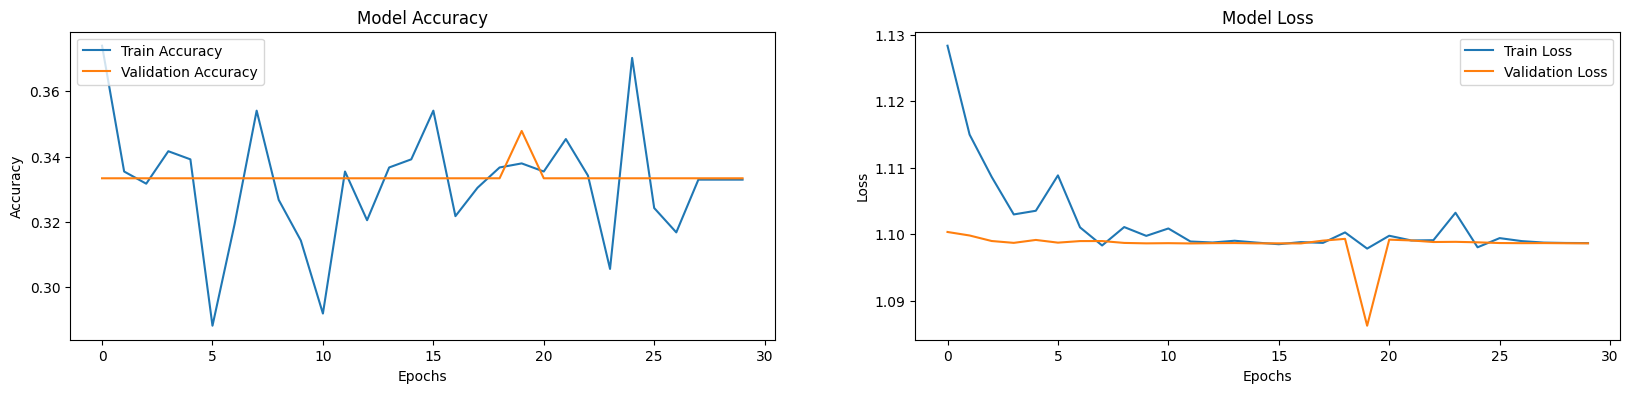

In [ ]:
# 1. Function to Display Training Loss & Accuracy

import matplotlib.pyplot as plt

def display_training_loss_accuracy(history, model_name):
    plt.figure(figsize=(20, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call function to display accuracy/loss plots
display_training_loss_accuracy(history1, model_name='model1')


In [ ]:
# 2. Generate Classification Reports

from sklearn.metrics import classification_report
import numpy as np

# Get model predictions for train & test
y_train_pred1 = np.argmax(model1.predict(x_mfcc_train), axis=1)
y_val_pred1 = np.argmax(model1.predict(x_mfcc_val), axis=1)

# Define class labels (Neutral, Positive, Negative)
labels = ['Neutral', 'Positive', 'Negative']

# Print classification reports
print("Train Data Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_train, y_train_pred1, target_names=labels))

print("\nValidation Data Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_val, y_val_pred1, target_names=labels))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Data Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00       268
    Positive       0.33      1.00      0.50       268
    Negative       0.00      0.00      0.00       269

    accuracy                           0.33       805
   macro avg       0.11      0.33      0.17       805
weighted avg       0.11      0.33      0.17       805


Validation Data Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00       115
    Positive       0.33      1.00      0.50       115
    Negative       0.00      0.00      0.00       115

    accuracy                           0.33       345
   macro avg       0.11      0.33      0.17       345
weighted avg       0.11   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


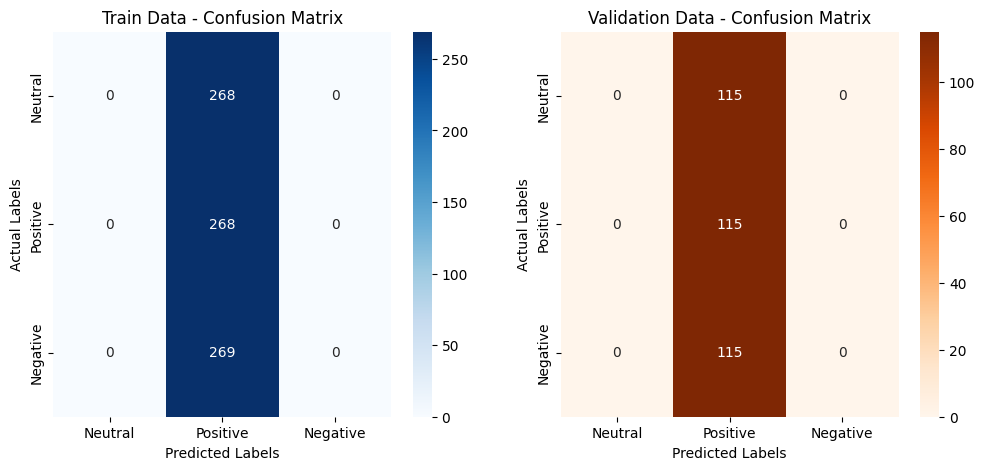

In [ ]:
# 3. Display Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def display_classification_confusion_matrix(model, x_train, y_train, x_val, y_val, labels):
    # Predict classes
    y_train_pred = np.argmax(model1.predict(x_train), axis=1)
    y_val_pred = np.argmax(model1.predict(x_val), axis=1)

    # Compute confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    val_cm = confusion_matrix(y_val, y_val_pred)

    # Plot Train Confusion Matrix
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Train Data - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")

    # Plot Validation Confusion Matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(val_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
    plt.title("Validation Data - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")

    plt.show()

# Call function to display confusion matrices
display_classification_confusion_matrix(model1, x_mfcc_train, y_train, x_mfcc_val, y_val, labels)


## Model 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

def build_improved_lstm(input_shape, num_classes):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        LSTM(64, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')  # 3 classes (Neutral, Positive, Negative)
    ])

    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Rebuild and Train
model2 = build_improved_lstm(x_mfcc_train.shape[1:], num_classes=3)
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 40, 128)             │          98,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,835 (597.01 KB)

 Trainable params: 152,451 (595.51 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
history2 = model2.fit(
    x_mfcc_train, y_train,
    validation_data=(x_mfcc_val, y_val),
    epochs=500, batch_size=32,
    callbacks=callbacks_list
)

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3886 - loss: 1.3965 - val_accuracy: 0.4174 - val_loss: 1.0496
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5035 - loss: 1.0123 - val_accuracy: 0.4464 - val_loss: 1.0288
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5730 - loss: 0.8915 - val_accuracy: 0.4812 - val_loss: 0.9984
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6604 - loss: 0.7569 - val_accuracy: 0.5275 - val_loss: 0.9538
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7359 - loss: 0.6126 - val_accuracy: 0.5594 - val_loss: 0.9120
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8130 - loss: 0.4793 - val_accuracy: 0.5855 - val_loss: 0.8942
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8298 - loss: 0.4487 - val_accuracy: 0.5681 - val_loss: 0.9129
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8528 - loss: 0.3987 - val_accuracy: 0.

## Visualize Training Peformance

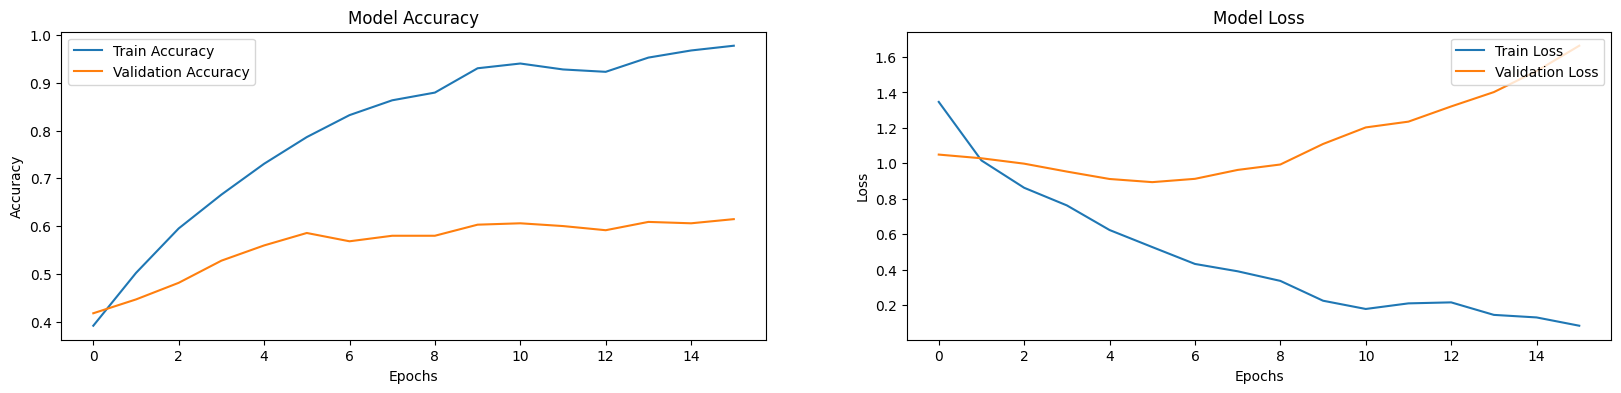

In [ ]:
# 1. Function to Display Training Loss & Accuracy

# Call function to display accuracy/loss plots
display_training_loss_accuracy(history2, model_name='model2')


In [ ]:
# 2. Generate Classification Reports

#from sklearn.metrics import classification_report
#import numpy as np

# Get model predictions for train & test
y_train_pred2 = np.argmax(model2.predict(x_mfcc_train), axis=1)
y_val_pred2 = np.argmax(model2.predict(x_mfcc_val), axis=1)

# Define class labels (Neutral, Positive, Negative)
#labels = ['Neutral', 'Positive', 'Negative']

# Print classification reports
print("Train Data Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_train, y_train_pred2, target_names=labels))

print("\nValidation Data Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_val, y_val_pred2, target_names=labels))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Data Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       268
    Positive       1.00      1.00      1.00       268
    Negative       1.00      1.00      1.00       269

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805


Validation Data Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       0.50      0.53      0.51       115
    Positive       0.70      0.73      0.71       115
    Negative       0.66      0.58      0.62       115

    accuracy                           0.61       345
   macro avg       0.62      0.61      0.62       345
weighted avg       0.62  

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


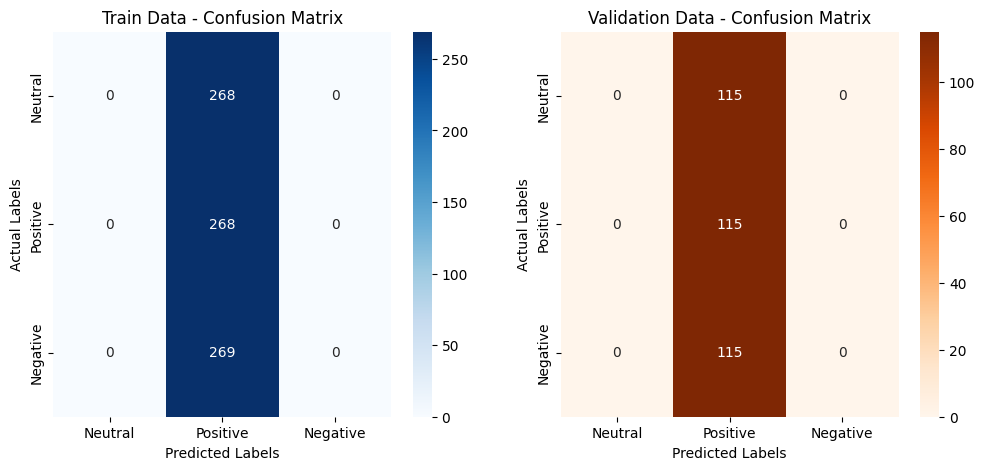

In [ ]:
# 3. Display Confusion Matrix

# Call function to display confusion matrices
display_classification_confusion_matrix(model2, x_mfcc_train, y_train, x_mfcc_val, y_val, labels)


## Model 3

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

def build_improved_lstm2(input_shape, num_classes):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape,
             kernel_regularizer=regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),  # Increase Dropout Rate

        LSTM(64, return_sequences=False,
             kernel_regularizer=regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),  # Increase Dropout Rate

        Dense(64, activation='relu',
              kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.4),  # Increase Dropout Rate

        Dense(num_classes, activation='softmax')
    ])

    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Rebuild and Train
model3 = build_improved_lstm2(x_mfcc_train.shape[1:], num_classes=3)
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 40, 128)             │          98,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 40, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,835 (597.01 KB)

 Trainable params: 152,451 (595.51 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Callbacks for saving the best model and early stopping
callbacks_list2 = [
    ModelCheckpoint(filepath=training_session_folder + '/mfcc_lstm_model.{epoch:04d}-acc-{accuracy:.2f}-val_acc-{val_accuracy:.2f}.keras',
                    monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=20),  # Increased patience
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)  # Learning rate scheduler
]

In [ ]:
history3 = model3.fit(
    x_mfcc_train, y_train,
    validation_data=(x_mfcc_val, y_val),
    epochs=500, batch_size=32,
    callbacks=callbacks_list2
)

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3615 - loss: 5.0217 - val_accuracy: 0.4058 - val_loss: 4.3699 - learning_rate: 0.0010
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4231 - loss: 4.5021 - val_accuracy: 0.4580 - val_loss: 4.1842 - learning_rate: 0.0010
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4801 - loss: 4.1971 - val_accuracy: 0.4870 - val_loss: 3.9824 - learning_rate: 0.0010
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5495 - loss: 3.8640 - val_accuracy: 0.5217 - val_loss: 3.7963 - learning_rate: 0.0010
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6243 - loss: 3.5969 - val_accuracy: 0.5652 - val_loss: 3.5973 - learning_rate: 0.0010
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6264 - loss: 3.4008 - val_accuracy: 0.5536 - val_loss: 3.4228 - learning_rate: 0.0010
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6921 - loss: 3.1665 - 

## Visualize Training Performance

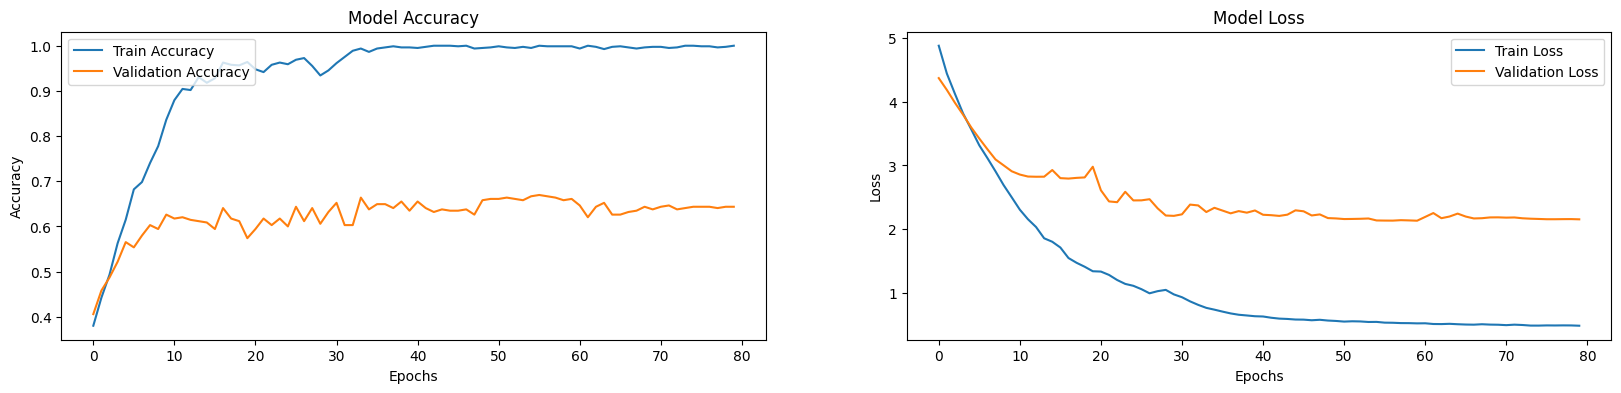

In [ ]:
# 1. Function to Display Training Loss & Accuracy

# Call function to display accuracy/loss plots
display_training_loss_accuracy(history3, model_name='model3')


In [ ]:
# 2. Generate Classification Reports

#from sklearn.metrics import classification_report
#import numpy as np

# Get model predictions for train & test
y_train_pred3 = np.argmax(model3.predict(x_mfcc_train), axis=1)
y_val_pred3 = np.argmax(model3.predict(x_mfcc_val), axis=1)

# Define class labels (Neutral, Positive, Negative)
#labels = ['Neutral', 'Positive', 'Negative']

# Print classification reports
print("Train Data Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_train, y_train_pred2, target_names=labels))

print("\nValidation Data Classification Report:")
print("--------------------------------------------------------")
print(classification_report(y_val, y_val_pred2, target_names=labels))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Data Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       268
    Positive       1.00      1.00      1.00       268
    Negative       1.00      1.00      1.00       269

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805


Validation Data Classification Report:
--------------------------------------------------------
              precision    recall  f1-score   support

     Neutral       0.50      0.53      0.51       115
    Positive       0.70      0.73      0.71       115
    Negative       0.66      0.58      0.62       115

    accuracy                           0.61       345
   macro avg       0.62      0.61      0.62       345
weighted avg       0.62  

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


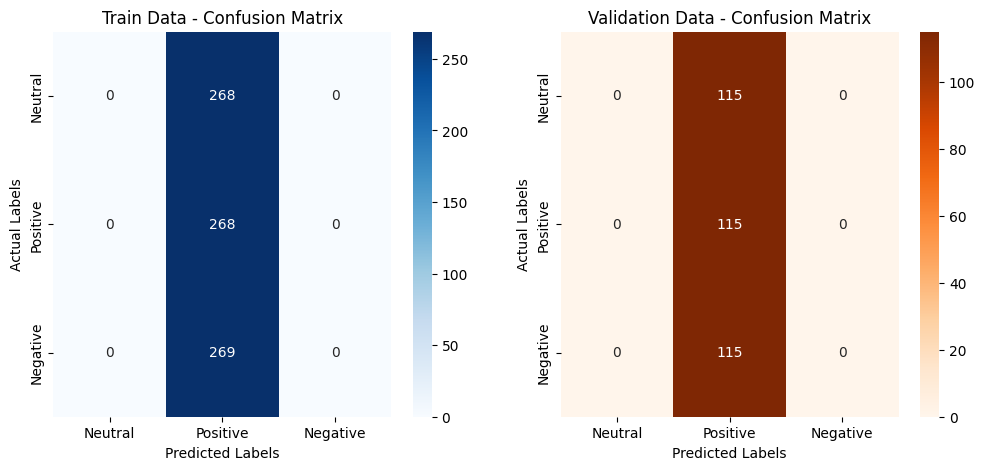

In [ ]:
# 3. Display Confusion Matrix

# Call function to display confusion matrices
display_classification_confusion_matrix(model3, x_mfcc_train, y_train, x_mfcc_val, y_val, labels)


## Comparing Multiple Models in One Graphs

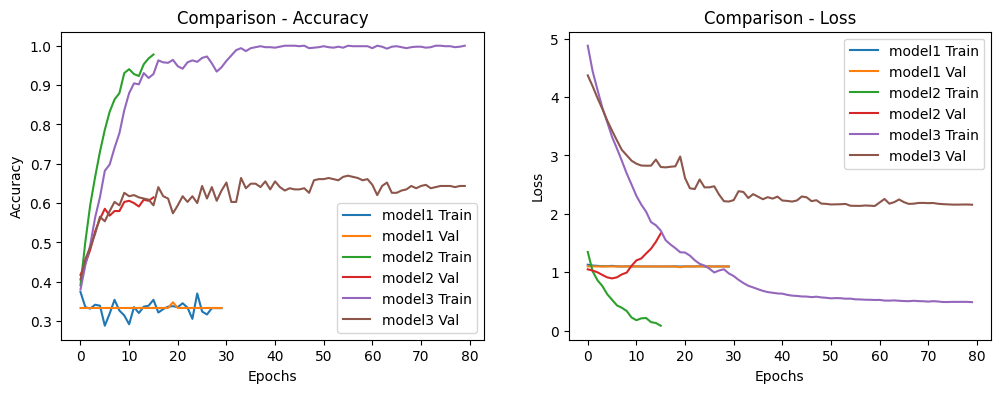

In [ ]:
def compare_histories(histories, labels):
    """Plots accuracy and loss for multiple models in one figure."""

    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} Train')
        plt.plot(history.history['val_accuracy'], label=f'{label} Val')
    plt.title('Comparison - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], label=f'{label} Val')
    plt.title('Comparison - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Example usage:
compare_histories([history1, history2, history3], ["model1", "model2", "model3"])


# 7 Deploy Model 3 (best model) into Hugging Face for Application Development with Gradio

## Step 1: Save the model

Before deploying the model, you need to save it. In TensorFlow, you can save the model using

In [ ]:
# Save the model in the .h5 format
model3.save('model3_lstm.h5')

## Step 2: Upload to Hugging Face

To upload your model to Hugging Face, you need to create an account on Hugging Face if you haven't already, and then create a model repository.

Token: hf_Sj.............

In [ ]:
pip install huggingface_hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `ITI110_Colab Access` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-a

In [ ]:
from huggingface_hub import upload_file

# Define the model path and repository name
model_path = 'model3_lstm.h5'  # Path to your saved model
repo_name = 'thmasquerade07/mySpeechEmotionRecognition'  # Replace with your Hugging Face repository name

# Upload the model
upload_file(path_or_fileobj=model_path, path_in_repo='model3_lstm.h5', repo_id=repo_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model3_lstm.h5:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/thmasquerade07/mySpeechEmotionRecognition/commit/0921115907e6b069d52d04181c0076088d55774b', commit_message='Upload model3_lstm.h5 with huggingface_hub', commit_description='', oid='0921115907e6b069d52d04181c0076088d55774b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/thmasquerade07/mySpeechEmotionRecognition', endpoint='https://huggingface.co', repo_type='model', repo_id='thmasquerade07/mySpeechEmotionRecognition'), pr_revision=None, pr_num=None)

## Step 3: Create a Gradio Interface

Gradio helps you build user interfaces easily for your models. You can create an interface to interact with your model in the browser.

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import tensorflow as tf
import librosa
import numpy as np
import soundfile as sf

# Load the model from Hugging Face (or locally if preferred)
model = tf.keras.models.load_model('model3_lstm.h5')

# Define the audio preprocessing function (based on your steps)
TARGET_SR = 16000  # Fixed Sampling Rate (16kHz)
TARGET_DURATION = 2.0  # Fixed duration in seconds
TARGET_SAMPLES = int(TARGET_SR * TARGET_DURATION)  # 32000 samples

def trim_silence(audio_path):
    """Trim leading/trailing silence from audio."""
    try:
        y, sr = librosa.load(audio_path, sr=None)  # Preserve original sampling rate
        y_trimmed, _ = librosa.effects.trim(y, top_db=20)  # Trim silence
        return y_trimmed, sr
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        return None, None

def preprocess_audio(input_audio):
    """Preprocess input audio for prediction."""
    # 1. Trim silence
    audio, sr = trim_silence(input_audio)
    if audio is None:
        return None

    # 2. Resample to 16kHz and pad/truncate to 32000 samples
    if len(audio) < TARGET_SAMPLES:
        audio = np.pad(audio, (0, TARGET_SAMPLES - len(audio)), mode='constant')
    else:
        audio = audio[:TARGET_SAMPLES]

    # 3. Extract MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=TARGET_SR, n_mfcc=40)  # (40, time_frames)
    return np.expand_dims(mfcc, axis=0)  # Expand to add batch dimension (1, 40, time_frames)

# Define a prediction function
def predict(input_audio):
    # Preprocess the audio input and extract features (e.g., MFCCs)
    # Example: Assuming 'extract_features' is a function you created for feature extraction
    features = preprocess_audio(input_audio)  # Adjust for your actual feature extraction
    if features is None:
        return "Error processing audio"

    # Predict using the model
    prediction = model.predict(features)

    # Map prediction to emotion label (adjust based on your labels)
    labels = ['neutral', 'positive', 'negative']
    return labels[np.argmax(prediction)]

# Create a Gradio interface
iface = gr.Interface(
    fn=predict,  # The function to use for predictions
    inputs=gr.Audio(type="filepath"),  # Upload audio file
    outputs="text",  # Output predicted emotion
    live=True  # Set to True for live predictions
)

# Launch the interface
iface.launch()


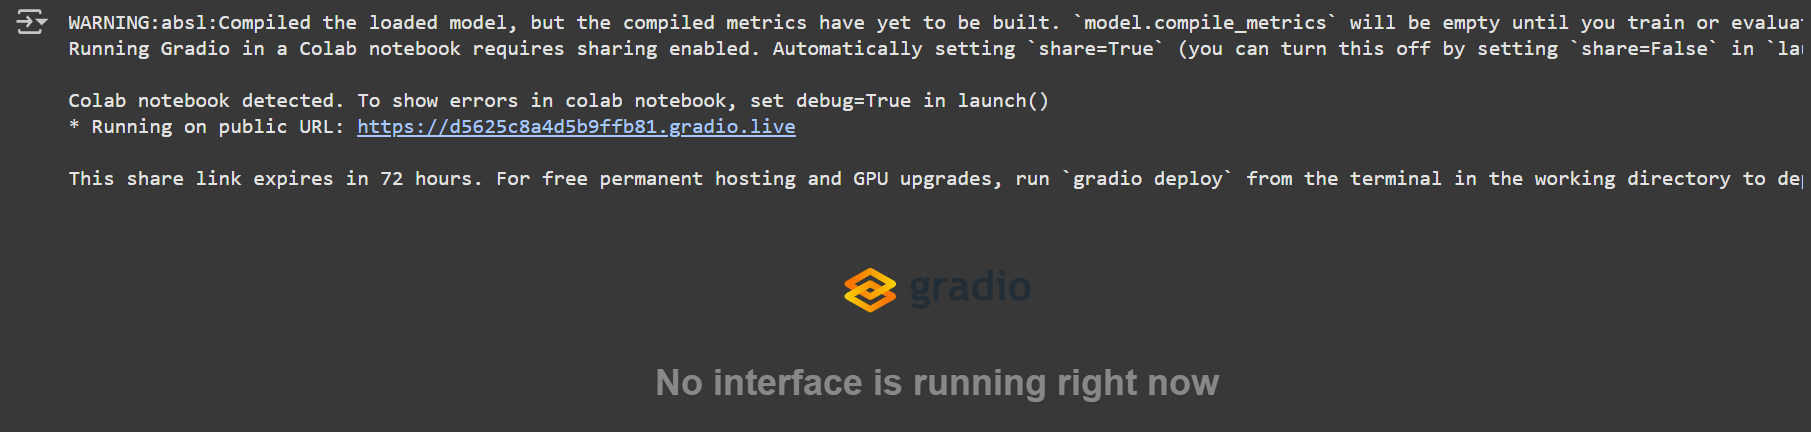